In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import chi2_contingency as cst
import warnings
warnings.filterwarnings('ignore')

In [2]:
aspiring=pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx")

In [3]:
aspiring.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

### We Drop The Unnamed Column as it doesnt look to have any importance here. But for safefy reasons we will slice the dataframe.

In [4]:
aspiring=aspiring.iloc[:,1:]

### Lets Look At Numerical and Cateogical Column names

In [5]:
categ=list()
numeric=list()
other=list()
for c,t in zip(aspiring.dtypes.index.to_list(),aspiring.dtypes.to_list()):
    if t=="object":
        categ.append([c,t])
    elif t=="int64" or t=="float64":
        numeric.append([c,t])
    else:
        other.append([c,t])
print("Numerical Cols :",numeric)
print("\ncategorical Cols :",categ)
print("\nDate time :",other)

Numerical Cols : [['ID', dtype('int64')], ['Salary', dtype('int64')], ['10percentage', dtype('float64')], ['12graduation', dtype('int64')], ['12percentage', dtype('float64')], ['CollegeID', dtype('int64')], ['CollegeTier', dtype('int64')], ['collegeGPA', dtype('float64')], ['CollegeCityID', dtype('int64')], ['CollegeCityTier', dtype('int64')], ['GraduationYear', dtype('int64')], ['English', dtype('int64')], ['Logical', dtype('int64')], ['Quant', dtype('int64')], ['Domain', dtype('float64')], ['ComputerProgramming', dtype('int64')], ['ElectronicsAndSemicon', dtype('int64')], ['ComputerScience', dtype('int64')], ['MechanicalEngg', dtype('int64')], ['ElectricalEngg', dtype('int64')], ['TelecomEngg', dtype('int64')], ['CivilEngg', dtype('int64')], ['conscientiousness', dtype('float64')], ['agreeableness', dtype('float64')], ['extraversion', dtype('float64')], ['nueroticism', dtype('float64')], ['openess_to_experience', dtype('float64')]]

categorical Cols : [['DOL', dtype('O')], ['Designat

### After looking at the datatypes we see that 71 percent of columns are numerical and 23 percent are categorical and 5 percent are dates

### Lets See the summary of dataset

In [6]:
aspiring.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [7]:
np.round(aspiring.describe())

ID     Salary  10percentage  12graduation  12percentage  \
count     3998.0     3998.0        3998.0        3998.0        3998.0   
mean    663795.0   307700.0          78.0        2008.0          74.0   
std     363218.0   212737.0          10.0           2.0          11.0   
min      11244.0    35000.0          43.0        1995.0          40.0   
25%     334284.0   180000.0          72.0        2007.0          66.0   
50%     639600.0   300000.0          79.0        2008.0          74.0   
75%     990480.0   370000.0          86.0        2009.0          83.0   
max    1298275.0  4000000.0          98.0        2013.0          99.0   

       CollegeID  CollegeTier  collegeGPA  CollegeCityID  CollegeCityTier  \
count     3998.0       3998.0      3998.0         3998.0           3998.0   
mean      5157.0          2.0        71.0         5157.0              0.0   
std       4802.0          0.0         8.0         4802.0              0.0   
min          2.0          1.0         6.0            2.0              0.0   
25%        494.0          2.0        66.0          494.0              0.0   
50%       3879.0          2.0        72.0         3879.0              0.0   
75%       8818.0          2.0        76.0         8818.0              1.0   
max      18409.0          2.0       100.0        18409.0              1.0   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...           3998.0          3998.0          3998.0       3998.0   
mean   ...             91.0            23.0            16.0         32.0   
std    ...            175.0            98.0            88.0        105.0   
min    ...             -1.0            -1.0            -1.0         -1.0   
25%    ...             -1.0            -1.0            -1.0         -1.0   
50%    ...             -1.0            -1.0            -1.0         -1.0   
75%    ...             -1.0            -1.0            -1.0         -1.0   
max    ...            715.0           623.0           676.0        548.0   

       CivilEngg  conscientiousness  agreeableness  extraversion  nueroticism  \
count     3998.0             3998.0         3998.0        3998.0       3998.0   
mean         3.0               -0.0            0.0           0.0         -0.0   
std         37.0                1.0            1.0           1.0          1.0   
min         -1.0               -4.0           -6.0          -5.0         -3.0   
25%         -1.0               -1.0           -0.0          -1.0         -1.0   
50%         -1.0                0.0            0.0           0.0         -0.0   
75%         -1.0                1.0            1.0           1.0          1.0   
max        516.0                2.0            2.0           3.0          3.0   

       openess_to_experience  
count                 3998.0  
mean                    -0.0  
std                      1.0  
min                     -7.0  
25%                     -1.0  
50%                     -0.0  
75%                      1.0  
max                      2.0  

[8 rows x 27 columns]

### From Aboove we see that for salary most of the data looks towards the max,but we cant say much about other columns precisely as there are null values and that needs to be cleaned,then only we can do our analysis.

### Lets Check dummy values filled in some columns and replace or remoove depending on what we see.

### We see that the dates are in the format of timestamp,so lets change them to dates and lets change the present in DOL to today's date,so the columns will have proper dates.

In [8]:
import datetime as dt
aspiring["DOJ"]=pd.to_datetime(aspiring["DOJ"]).dt.date
aspiring["DOL"].replace("present",dt.datetime.today(),inplace=True)
aspiring["DOL"]=pd.to_datetime(aspiring["DOL"]).dt.date
aspiring["Year"]=pd.to_datetime(aspiring["DOL"]).dt.year
aspiring["Month"]=pd.to_datetime(aspiring["DOL"]).dt.month
aspiring["Day"]=pd.to_datetime(aspiring["DOL"]).dt.day

### In Designation,We See one garbage value "get". So we dont know what proffesion is that or whatever. So we will replace it with mode.

### Lets Check what cities lie besides -1 and based on that lets see the proffesion if we can find else we will replace by mode

In [9]:
aspiring[aspiring["Designation"]=="get"][["ID","JobCity"]]

ID    JobCity
4      343523    Manesar
332    597966         -1
350     38162  Faridabad
1717   330551  Hyderabad
1897  1064862  Hyderabad
2140   796296     Indore
2318  1094242    Lucknow
2443  1259589  kharagpur
2666   110817  Hyderabad
2757  1083682     Nashik
3045    35694  Sahibabad
3126    87319     Bhopal
3594   967009     MEERUT
3980   197796    haryana

### In Aboove we see that Hyderabad has multiple counts when we count the value. so lets make it standard.

### As we can see all the values are having capital letter as start. We could have converted them to uppercase,lowecase or start letter lowercase anything you want

In [10]:
aspiring["JobCity"].replace(-1,"Unknown",inplace=True)
aspiring["JobCity"]=aspiring["JobCity"].apply(lambda x:x.title())
aspiring["JobCity"].replace("Mumbai ","Mumbai",inplace=True)

In [11]:
aspiring["JobCity"].value_counts()

Bangalore       647
Unknown         461
Noida           386
Hyderabad       357
Pune            320
               ... 
Jaspur            1
Yamuna Nagar      1
Nouda             1
Kharagpur         1
Haryana           1
Name: JobCity, Length: 261, dtype: int64

### Now lets check what values other colums have with get as value in designation,using median or mode we will replace get

##### Categorical Analysis

In [12]:
aspiring[aspiring["Designation"]=="get"][["Year","Month","JobCity","Gender","10percentage","10board","12percentage","12board","Degree","Specialization","CollegeState","GraduationYear"]].mode()

Year  Month    JobCity Gender  10percentage 10board  12percentage  \
0   2021.0   11.0  Hyderabad      m          80.0    cbse         64.20   
1      NaN    NaN        NaN    NaN           NaN     NaN         67.00   
2      NaN    NaN        NaN    NaN           NaN     NaN         72.00   
3      NaN    NaN        NaN    NaN           NaN     NaN         73.40   
4      NaN    NaN        NaN    NaN           NaN     NaN         73.80   
5      NaN    NaN        NaN    NaN           NaN     NaN         74.40   
6      NaN    NaN        NaN    NaN           NaN     NaN         74.53   
7      NaN    NaN        NaN    NaN           NaN     NaN         76.00   
8      NaN    NaN        NaN    NaN           NaN     NaN         76.80   
9      NaN    NaN        NaN    NaN           NaN     NaN         79.90   
10     NaN    NaN        NaN    NaN           NaN     NaN         82.70   
11     NaN    NaN        NaN    NaN           NaN     NaN         85.80   
12     NaN    NaN        NaN    NaN           NaN     NaN         90.00   
13     NaN    NaN        NaN    NaN           NaN     NaN         90.60   

   12board       Degree          Specialization   CollegeState  GraduationYear  
0     cbse  B.Tech/B.E.  mechanical engineering  Uttar Pradesh          2014.0  
1      NaN          NaN                     NaN            NaN             NaN  
2      NaN          NaN                     NaN            NaN             NaN  
3      NaN          NaN                     NaN            NaN             NaN  
4      NaN          NaN                     NaN            NaN             NaN  
5      NaN          NaN                     NaN            NaN             NaN  
6      NaN          NaN                     NaN            NaN             NaN  
7      NaN          NaN                     NaN            NaN             NaN  
8      NaN          NaN                     NaN            NaN             NaN  
9      NaN          NaN                     NaN            NaN             NaN  
10     NaN          NaN                     NaN            NaN             NaN  
11     NaN          NaN                     NaN            NaN             NaN  
12     NaN          NaN                     NaN            NaN             NaN  
13     NaN          NaN                     NaN            NaN             NaN

##### Numerical Analysis

In [13]:
aspiring[aspiring["Designation"]=="get"][["10percentage","12percentage","collegeGPA","Salary"]].mode()

10percentage  12percentage  collegeGPA    Salary
0           80.0         64.20       61.00  180000.0
1            NaN         67.00       64.00  200000.0
2            NaN         72.00       65.05       NaN
3            NaN         73.40       66.67       NaN
4            NaN         73.80       67.00       NaN
5            NaN         74.40       68.00       NaN
6            NaN         74.53       71.00       NaN
7            NaN         76.00       73.00       NaN
8            NaN         76.80       73.30       NaN
9            NaN         79.90       73.90       NaN
10           NaN         82.70       75.39       NaN
11           NaN         85.80       78.00       NaN
12           NaN         90.00       80.60       NaN
13           NaN         90.60       87.70       NaN

### Lets Check each column values one by one instead of all at once. We can check all values at once as thats comvinient but all value filters may or may not match and remooving columns from filter become tedious and we too dont know how to set the filter accurately. So we take mode of designation by comapring to each column one by one and putting those mode value in a list and then taking a mode. This will be like each column voting for a designation and then selecting value having max counts.


### Each With only 4 ot 5 columns is also enough but more the columns better  the accuracy

In [14]:
getValue=[]

In [15]:
getValue.append(aspiring[(aspiring["Year"]==2021) | (aspiring["Month"]==7)]["Designation"].mode().to_list()[0])
getValue.append(aspiring[aspiring["JobCity"]=="Hyderabad"]["Designation"].mode().to_list()[0])
getValue.append(aspiring[aspiring["Gender"]=="m"]["Designation"].mode().to_list()[0])
getValue.append(aspiring[aspiring["10percentage"]==80]["Designation"].mode().to_list()[0])
getValue.append(aspiring[aspiring["10board"]=="cbse"]["Designation"].mode().to_list()[0])
getValue.append(aspiring[aspiring["12percentage"]==64.2]["Designation"].mode().to_list()[0])
getValue.append(aspiring[aspiring["12board"]=="cbse"]["Designation"].mode().to_list()[0])
getValue.append(aspiring[aspiring["Degree"].str.startswith("B.Tech/")]["Designation"].mode().to_list()[0])
getValue.append(aspiring[aspiring["Specialization"].str.startswith("mechanical")]["Designation"].mode().to_list()[0])
getValue.append(aspiring[aspiring["CollegeState"].str.startswith("Uttar Pradesh")]["Designation"].mode().to_list()[0])
getValue.append(aspiring[aspiring["GraduationYear"]==2014]["Designation"].mode().to_list()[0])

In [16]:
getValue

['software engineer',
 'software engineer',
 'software engineer',
 'software engineer',
 'software engineer',
 'get',
 'software engineer',
 'software engineer',
 'production engineer',
 'software engineer',
 'software engineer']

In [17]:
designation_value=pd.DataFrame({"DesignationValue":getValue})

In [18]:
designation_value=designation_value["DesignationValue"].mode().to_list()[0]

In [19]:
aspiring["Designation"].replace("get",designation_value,inplace=True)

### Now Replacing "Unknown" Value in Job City

In [20]:
aspiring[aspiring["JobCity"]=="Unknown"][["Year","Month","Designation","10percentage","12percentage","collegeGPA","Salary","Degree","Specialization","CollegeState","GraduationYear"]].mode()

Year  Month        Designation  10percentage  12percentage  collegeGPA  \
0  2021.0   11.0  software engineer          76.0          64.0        70.0   
1     NaN    NaN                NaN          78.0          66.0        72.0   
2     NaN    NaN                NaN          82.0           NaN         NaN   

     Salary       Degree                             Specialization  \
0  200000.0  B.Tech/B.E.  electronics and communication engineering   
1       NaN          NaN                                        NaN   
2       NaN          NaN                                        NaN   

    CollegeState  GraduationYear  
0  Uttar Pradesh          2013.0  
1            NaN             NaN  
2            NaN             NaN

In [21]:
getValue_1=[]

In [22]:
getValue_1.append(aspiring[(aspiring["Year"]==2021) | (aspiring["Month"]==7)]["JobCity"].mode().to_list()[0])
getValue_1.append(aspiring[aspiring["Designation"]=="software engineer"]["JobCity"].mode().to_list()[0])
getValue_1.append(aspiring[aspiring["Gender"]=="m"]["JobCity"].mode().to_list()[0])
getValue_1.append(aspiring[aspiring["10percentage"]==76]["JobCity"].mode().to_list()[0])
getValue_1.append(aspiring[aspiring["10board"]=="cbse"]["JobCity"].mode().to_list()[0])
getValue_1.append(aspiring[aspiring["12percentage"]==64]["JobCity"].mode().to_list()[0])
getValue_1.append(aspiring[aspiring["12board"]=="cbse"]["JobCity"].mode().to_list()[0])
getValue_1.append(aspiring[aspiring["collegeGPA"]==70]["JobCity"].mode().to_list()[0])
getValue_1.append(aspiring[aspiring["Salary"]==200000]["JobCity"].mode().to_list()[0])
getValue_1.append(aspiring[aspiring["Degree"].str.startswith("B.Tech/")]["JobCity"].mode().to_list()[0])
getValue_1.append(aspiring[aspiring["Specialization"].str.startswith("electronics and communication eng")]["JobCity"].mode().to_list()[0])
getValue_1.append(aspiring[aspiring["CollegeState"].str.startswith("Uttar Pradesh")]["JobCity"].mode().to_list()[0])
getValue_1.append(aspiring[aspiring["GraduationYear"]==2013]["JobCity"].mode().to_list()[0])

In [23]:
city_value=pd.DataFrame({"CityValue":getValue_1})
city_value=city_value["CityValue"].mode().to_list()[0]
aspiring["JobCity"].replace("Unknown",city_value,inplace=True)
aspiring["JobCity"].replace("Bangalore","Bengalru",inplace=True)
aspiring["JobCity"].replace("Banaglore","Bengalru",inplace=True)
aspiring["JobCity"].replace("Chennai, Bangalore","Bengalru",inplace=True)
aspiring["JobCity"].replace(" Bangalore","Bengalru",inplace=True)
aspiring["JobCity"].replace("Bangalore ","Bengalru",inplace=True)
aspiring["JobCity"].replace("Banglore","Bengalru",inplace=True)
aspiring["JobCity"].replace("Jaipur ","Jaipur",inplace=True)
aspiring["JobCity"].replace("Gandhinagar","Gandhi Nagar",inplace=True)
aspiring["JobCity"].replace("Bangalore ","Bengalru",inplace=True)
aspiring["JobCity"].replace("Jaipur ","Jaipur",inplace=True)
aspiring["JobCity"].replace("Gandhinagar","Gandhi Nagar",inplace=True)
aspiring["JobCity"].replace("Hyderabad ","Hyderabad",inplace=True)
aspiring["JobCity"].replace("Hyderabad(Bhadurpally)","Hyderabad",inplace=True)
aspiring["JobCity"].replace("Bhubaneswar ","Bhubaneswar",inplace=True)
aspiring["JobCity"].replace("Delhi/Ncr","Delhi",inplace=True)
aspiring["JobCity"].replace("Nagpur ","Nagpur",inplace=True)
aspiring["JobCity"].replace("Pune ","Pune",inplace=True)
aspiring["JobCity"].replace("Trivandrum ","Trivandrum",inplace=True)
aspiring["JobCity"].replace("Thiruvananthapuram","Trivandrum",inplace=True)
aspiring.drop(2450,inplace=True,axis=0)

In [24]:
aspiring[aspiring["JobCity"]=="Navi Mumbai , Hyderabad"]

Empty DataFrame
Columns: [ID, Salary, DOJ, DOL, Designation, JobCity, Gender, DOB, 10percentage, 10board, 12graduation, 12percentage, 12board, CollegeID, CollegeTier, Degree, Specialization, collegeGPA, CollegeCityID, CollegeCityTier, CollegeState, GraduationYear, English, Logical, Quant, Domain, ComputerProgramming, ElectronicsAndSemicon, ComputerScience, MechanicalEngg, ElectricalEngg, TelecomEngg, CivilEngg, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience, Year, Month, Day]
Index: []

[0 rows x 41 columns]

### Aboove We have replaced banaglore spelling with names of thier cities like banglore to bengalru thats it.

### Now replacing "0" in 10board

In [25]:
aspiring[aspiring["10board"]==0][["Year","Month","Gender","JobCity","Designation","10percentage","12percentage","12board","collegeGPA","Salary","Degree","Specialization","CollegeState","GraduationYear"]].mode()

Year  Month Gender   JobCity        Designation  10percentage  \
0  2021.0   11.0      m  Bengalru  software engineer          75.0   
1     NaN    NaN    NaN       NaN                NaN           NaN   

   12percentage 12board  collegeGPA    Salary       Degree  \
0          65.0       0        65.0  400000.0  B.Tech/B.E.   
1           NaN     NaN        72.0       NaN          NaN   

         Specialization CollegeState  GraduationYear  
0  computer engineering   Tamil Nadu          2012.0  
1                   NaN          NaN             NaN

In [26]:
getValue_2=[]

In [27]:
getValue_2.append(aspiring[(aspiring["Year"]==2021) | (aspiring["Month"]==7)]["10board"].mode().to_list()[0])
getValue_2.append(aspiring[aspiring["Designation"]=="software engineer"]["10board"].mode().to_list()[0])
getValue_2.append(aspiring[aspiring["Gender"]=="m"]["10board"].mode().to_list()[0])
getValue_2.append(aspiring[aspiring["10percentage"]==75]["10board"].mode().to_list()[0])
getValue_2.append(aspiring[aspiring["JobCity"]=="Bengalru"]["10board"].mode().to_list()[0])
getValue_2.append(aspiring[aspiring["12percentage"]==65]["10board"].mode().to_list()[0])
getValue_2.append(aspiring[aspiring["collegeGPA"]==65]["10board"].mode().to_list()[0])
getValue_2.append(aspiring[aspiring["Salary"]==400000]["10board"].mode().to_list()[0])
getValue_2.append(aspiring[aspiring["Degree"].str.startswith("B.Tech/")]["10board"].mode().to_list()[0])
getValue_2.append(aspiring[aspiring["Specialization"].str.startswith("computer eng")]["10board"].mode().to_list()[0])
getValue_2.append(aspiring[aspiring["CollegeState"].str.startswith("Tamil Nadu")]["10board"].mode().to_list()[0])
getValue_2.append(aspiring[aspiring["GraduationYear"]==2012]["10board"].mode().to_list()[0])

In [28]:
sscBoardValue=pd.DataFrame({"sscBoardValue":getValue_2})
sscBoardValue=sscBoardValue["sscBoardValue"].mode().to_list()[0]
aspiring["10board"].replace(0,sscBoardValue,inplace=True)

In [29]:
aspiring["10board"].value_counts()

cbse                                          1745
state board                                   1163
icse                                           281
ssc                                            122
up board                                        85
                                              ... 
mp state board                                   1
himachal pradesh board of school education       1
seba(assam)                                      1
nagpur board,nagpur                              1
tamil nadu state                                 1
Name: 10board, Length: 274, dtype: int64

### Now replacing "0" in 12board

In [30]:
aspiring[aspiring["12board"]==0][["Year","Month","Gender","JobCity","Designation","10percentage","12percentage","12board","collegeGPA","Salary","Degree","Specialization","CollegeState","GraduationYear"]].mode()

Year  Month Gender   JobCity        Designation  10percentage  \
0  2021.0   11.0      m  Bengalru  software engineer          75.0   
1     NaN    NaN    NaN       NaN    system engineer           NaN   

   12percentage 12board  collegeGPA    Salary       Degree  \
0          65.0       0        65.0  400000.0  B.Tech/B.E.   
1           NaN     NaN        72.0       NaN          NaN   

         Specialization CollegeState  GraduationYear  
0  computer engineering   Tamil Nadu          2012.0  
1                   NaN          NaN             NaN

### Looks Like 12 Board has same values of mode as it was for 10board,so rather than making other list and taking mode,lets assign the same mode of ssc to 12th.

In [31]:
aspiring["12board"].replace(0,sscBoardValue,inplace=True)

### Lets replace Domain column values. This Colum is whole numeric and looks like its standardized. So lets replace its value -1 with mean or median or mode,whatever looks good.

<AxesSubplot:xlabel='Domain'>

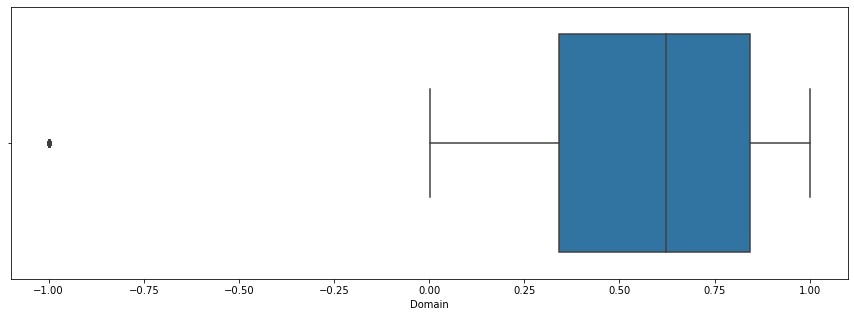

In [32]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Domain",data=aspiring)

### With the aboove box plot it looks like there are outliers in the Domain and thats -1, so replacing with mean wont be good choice. I mean we can take the set which doesnt have -1 and take its mean and replace the value but median seems better choice and mode better than median but with median or mode,we can go with anyone. lets go with median

In [33]:
aspiring["Domain"].replace(-1,aspiring["Domain"].median(),inplace=True)

In [34]:
aspiring.replace(-1,0,inplace=True)

### Some colums like ID are useless so lets drop them. Infact you can drop these colums before data cleaning too.

In [35]:
aspiring.drop(["CollegeID","CollegeCityID","ID"],axis=1,inplace=True)

In [36]:
# aspiring.drop(["ID"],axis=1,inplace=True)

<AxesSubplot:>

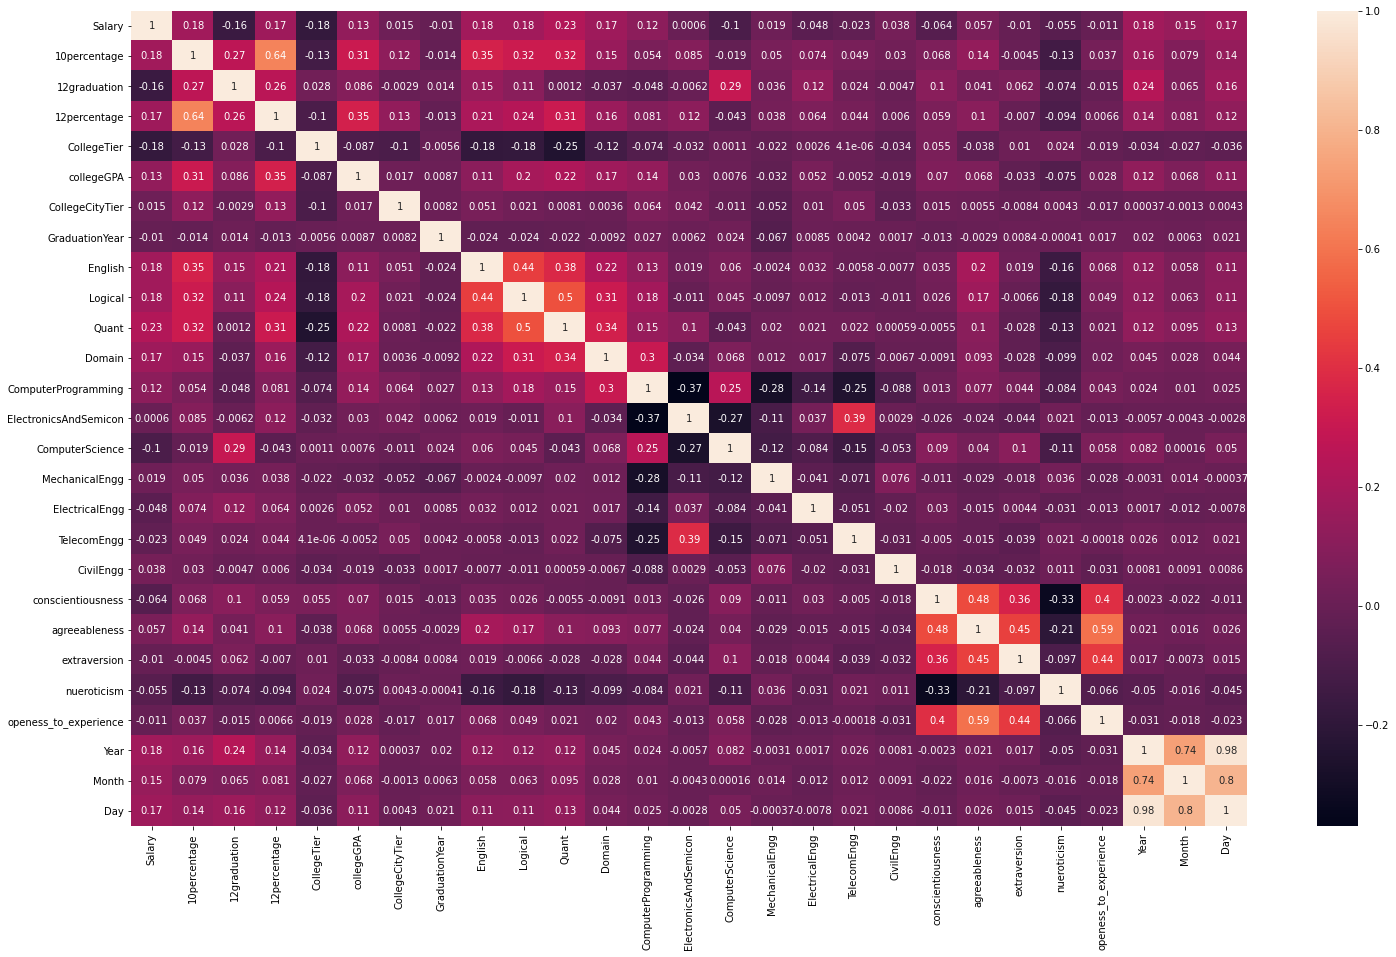

In [37]:
plt.figure(figsize=(25,15))
sns.heatmap(aspiring.corr(),annot=True)

#### Looking Over pairplot and heatmap that mostly all features are independent.

### Lets Select Top 20 professions which have maximum salary

In [38]:
aspiring.sort_values("Salary",ascending=False)

Salary         DOJ         DOL                Designation    JobCity  \
1237  4000000  2010-07-01  2015-03-01   senior software engineer  New Delhi   
2182  4000000  2010-01-01  2011-12-01        automation engineer    Gurgaon   
779   3500000  2013-01-01  2014-10-01  assistant system engineer       Pune   
1759  3000000  2014-09-01  2015-03-01                 programmer   Bengalru   
500   2600000  2011-07-01  2013-04-01      application developer   Bengalru   
...       ...         ...         ...                        ...        ...   
1837    40000  2013-11-01  2014-11-01    product design engineer   Bengalru   
3231    40000  2013-10-01  2014-07-01      application developer   Bengalru   
2627    35000  2012-03-01  2021-11-15           systems engineer      Noida   
194     35000  2012-01-01  2021-11-15           systems engineer    Gurgaon   
3473    35000  2014-05-01  2015-05-01             .net developer  Hyderabad   

     Gender        DOB  10percentage      10board  12graduation  ...  \
1237      m 1987-09-09         90.83         rbse          2005  ...   
2182      m 1987-09-13         53.00      up bord          2004  ...   
779       f 1990-08-07         76.80         cbse          2009  ...   
1759      m 1992-08-01         89.00         cbse          2009  ...   
500       m 1989-05-27         86.60         cbse          2007  ...   
...     ...        ...           ...          ...           ...  ...   
1837      m 1992-06-03         79.20  state board          2009  ...   
3231      m 1991-04-01         64.00         cbse          2008  ...   
2627      m 1989-11-24         88.00         icse          2007  ...   
194       f 1989-08-16         86.00         cbse          2007  ...   
3473      m 1993-01-08         85.30  state board          2010  ...   

      TelecomEngg CivilEngg  conscientiousness agreeableness extraversion  \
1237            0         0            -0.7264        0.0328      -1.6502   
2182            0         0            -3.3539       -0.4353      -1.0697   
779             0         0             0.1623        0.3448      -0.3440   
1759            0         0            -0.0154        0.7119       0.4711   
500             0         0             0.3555        0.9688       0.0914   
...           ...       ...                ...           ...          ...   
1837            0         0            -1.0208       -0.7866      -1.0659   
3231            0         0             1.8517        0.2124       2.1617   
2627            0         0             0.2009        0.0328      -0.9245   
194             0         0            -2.5811        0.0328       0.3817   
3473            0         0            -3.7496       -5.6151      -3.8324   

      nueroticism  openess_to_experience  Year  Month  Day  
1237     -0.87780                -0.1295  2015      3    1  
2182     -0.05520                -2.6572  2011     12    1  
779      -0.17277                 0.6603  2014     10    1  
1759     -0.61470                 0.2889  2015      3    1  
500      -0.87780                -0.7615  2013      4    1  
...           ...                    ...   ...    ...  ...  
1837     -0.36120                -2.5853  2014     11    1  
3231     -2.00920                -0.2859  2014      7    1  
2627      0.29730                -0.1295  2021     11   15  
194       0.41480                -1.0774  2021     11   15  
3473     -0.48790                -7.3757  2015      5    1  

[3997 rows x 38 columns]

### Below are top 20 fields of AMCAT aspirants which have maximum salary

In [39]:
top_20_fields=list(aspiring.sort_values("Salary",ascending=False)["Designation"].unique())[:20]
print(top_20_fields)

['senior software engineer', 'automation engineer', 'assistant system engineer', 'programmer', 'application developer', 'software test engineer', 'software developer', 'software engineer trainee', 'operations analyst', 'technical lead', 'data scientist', 'it technician', 'field engineer', 'client services associate', 'salesforce developer', 'java software engineer', 'software engineer', 'sales account manager', 'junior manager', 'senior engineer']


In [40]:
minds=aspiring[aspiring["Designation"].isin(top_20_fields)]
minds.groupby(["Designation"])["Salary"].describe().sort_values("max",ascending=False)

count          mean           std        min  \
Designation                                                               
automation engineer         15.0  6.406667e+05  9.481069e+05   110000.0   
senior software engineer    71.0  5.468310e+05  4.547615e+05   215000.0   
assistant system engineer   23.0  4.823913e+05  6.583500e+05   290000.0   
programmer                  36.0  3.259722e+05  4.783511e+05    60000.0   
application developer       52.0  4.190385e+05  3.878713e+05    40000.0   
software test engineer     100.0  3.374500e+05  3.051780e+05    60000.0   
software developer         265.0  2.583774e+05  1.784195e+05    50000.0   
software engineer trainee    3.0  7.816667e+05  1.099231e+06   105000.0   
operations analyst          12.0  4.437500e+05  5.075302e+05   145000.0   
it technician                6.0  5.183333e+05  7.270878e+05   180000.0   
data scientist               3.0  8.966667e+05  9.612665e+05   240000.0   
technical lead               5.0  6.690000e+05  7.642104e+05   120000.0   
field engineer               3.0  8.016667e+05  9.165742e+05   265000.0   
salesforce developer         7.0  4.607143e+05  5.981808e+05    95000.0   
client services associate   13.0  3.523077e+05  4.491966e+05   120000.0   
java software engineer     111.0  3.013063e+05  1.751372e+05   105000.0   
software engineer          553.0  3.404250e+05  1.494414e+05    60000.0   
sales account manager        2.0  7.100000e+05  8.626703e+05   100000.0   
junior manager               1.0  1.300000e+06           NaN  1300000.0   
senior engineer             18.0  5.250000e+05  2.462244e+05   250000.0   

                                 25%        50%        75%        max  
Designation                                                            
automation engineer         307500.0   400000.0   512500.0  4000000.0  
senior software engineer    355000.0   460000.0   612500.0  4000000.0  
assistant system engineer   325000.0   350000.0   372500.0  3500000.0  
programmer                  148750.0   210000.0   312500.0  3000000.0  
application developer       300000.0   350000.0   411250.0  2600000.0  
software test engineer      218750.0   300000.0   360000.0  2500000.0  
software developer          145000.0   240000.0   340000.0  2300000.0  
software engineer trainee   147500.0   190000.0  1120000.0  2050000.0  
operations analyst          247500.0   290000.0   415000.0  2020000.0  
it technician               200000.0   215000.0   282500.0  2000000.0  
data scientist              345000.0   450000.0  1225000.0  2000000.0  
technical lead              215000.0   465000.0   545000.0  2000000.0  
field engineer              272500.0   280000.0  1070000.0  1860000.0  
salesforce developer        180000.0   280000.0   345000.0  1800000.0  
client services associate   180000.0   205000.0   275000.0  1800000.0  
java software engineer      202500.0   300000.0   350000.0  1745000.0  
software engineer           250000.0   320000.0   400000.0  1500000.0  
sales account manager       405000.0   710000.0  1015000.0  1320000.0  
junior manager             1300000.0  1300000.0  1300000.0  1300000.0  
senior engineer             370000.0   485000.0   583750.0  1300000.0

### From aboove we see that automation engineer has more salary and senior engineer has less salary. It maybe that Automation engineer has more exp or the fields i high level while engineer whithout any field but seniority stands low

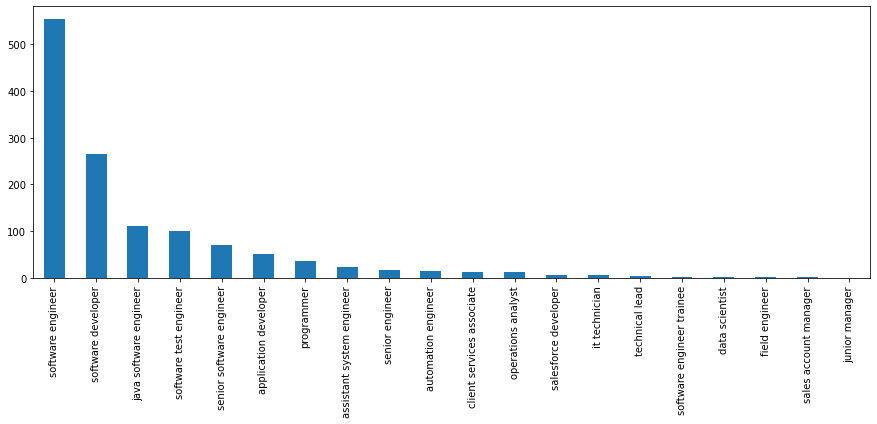

In [41]:
plt.figure(figsize=(15,5))
minds["Designation"].value_counts().plot(kind="bar")
top_20_sal_fields=minds["Designation"].value_counts().index.to_list()

### From aboove we see that most of the aspirants work in IT Domain with Software enginner as proffesion and second and third top as software developer and java Sw engineer. I mean the Top 5 are Having Field of IT Domain

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

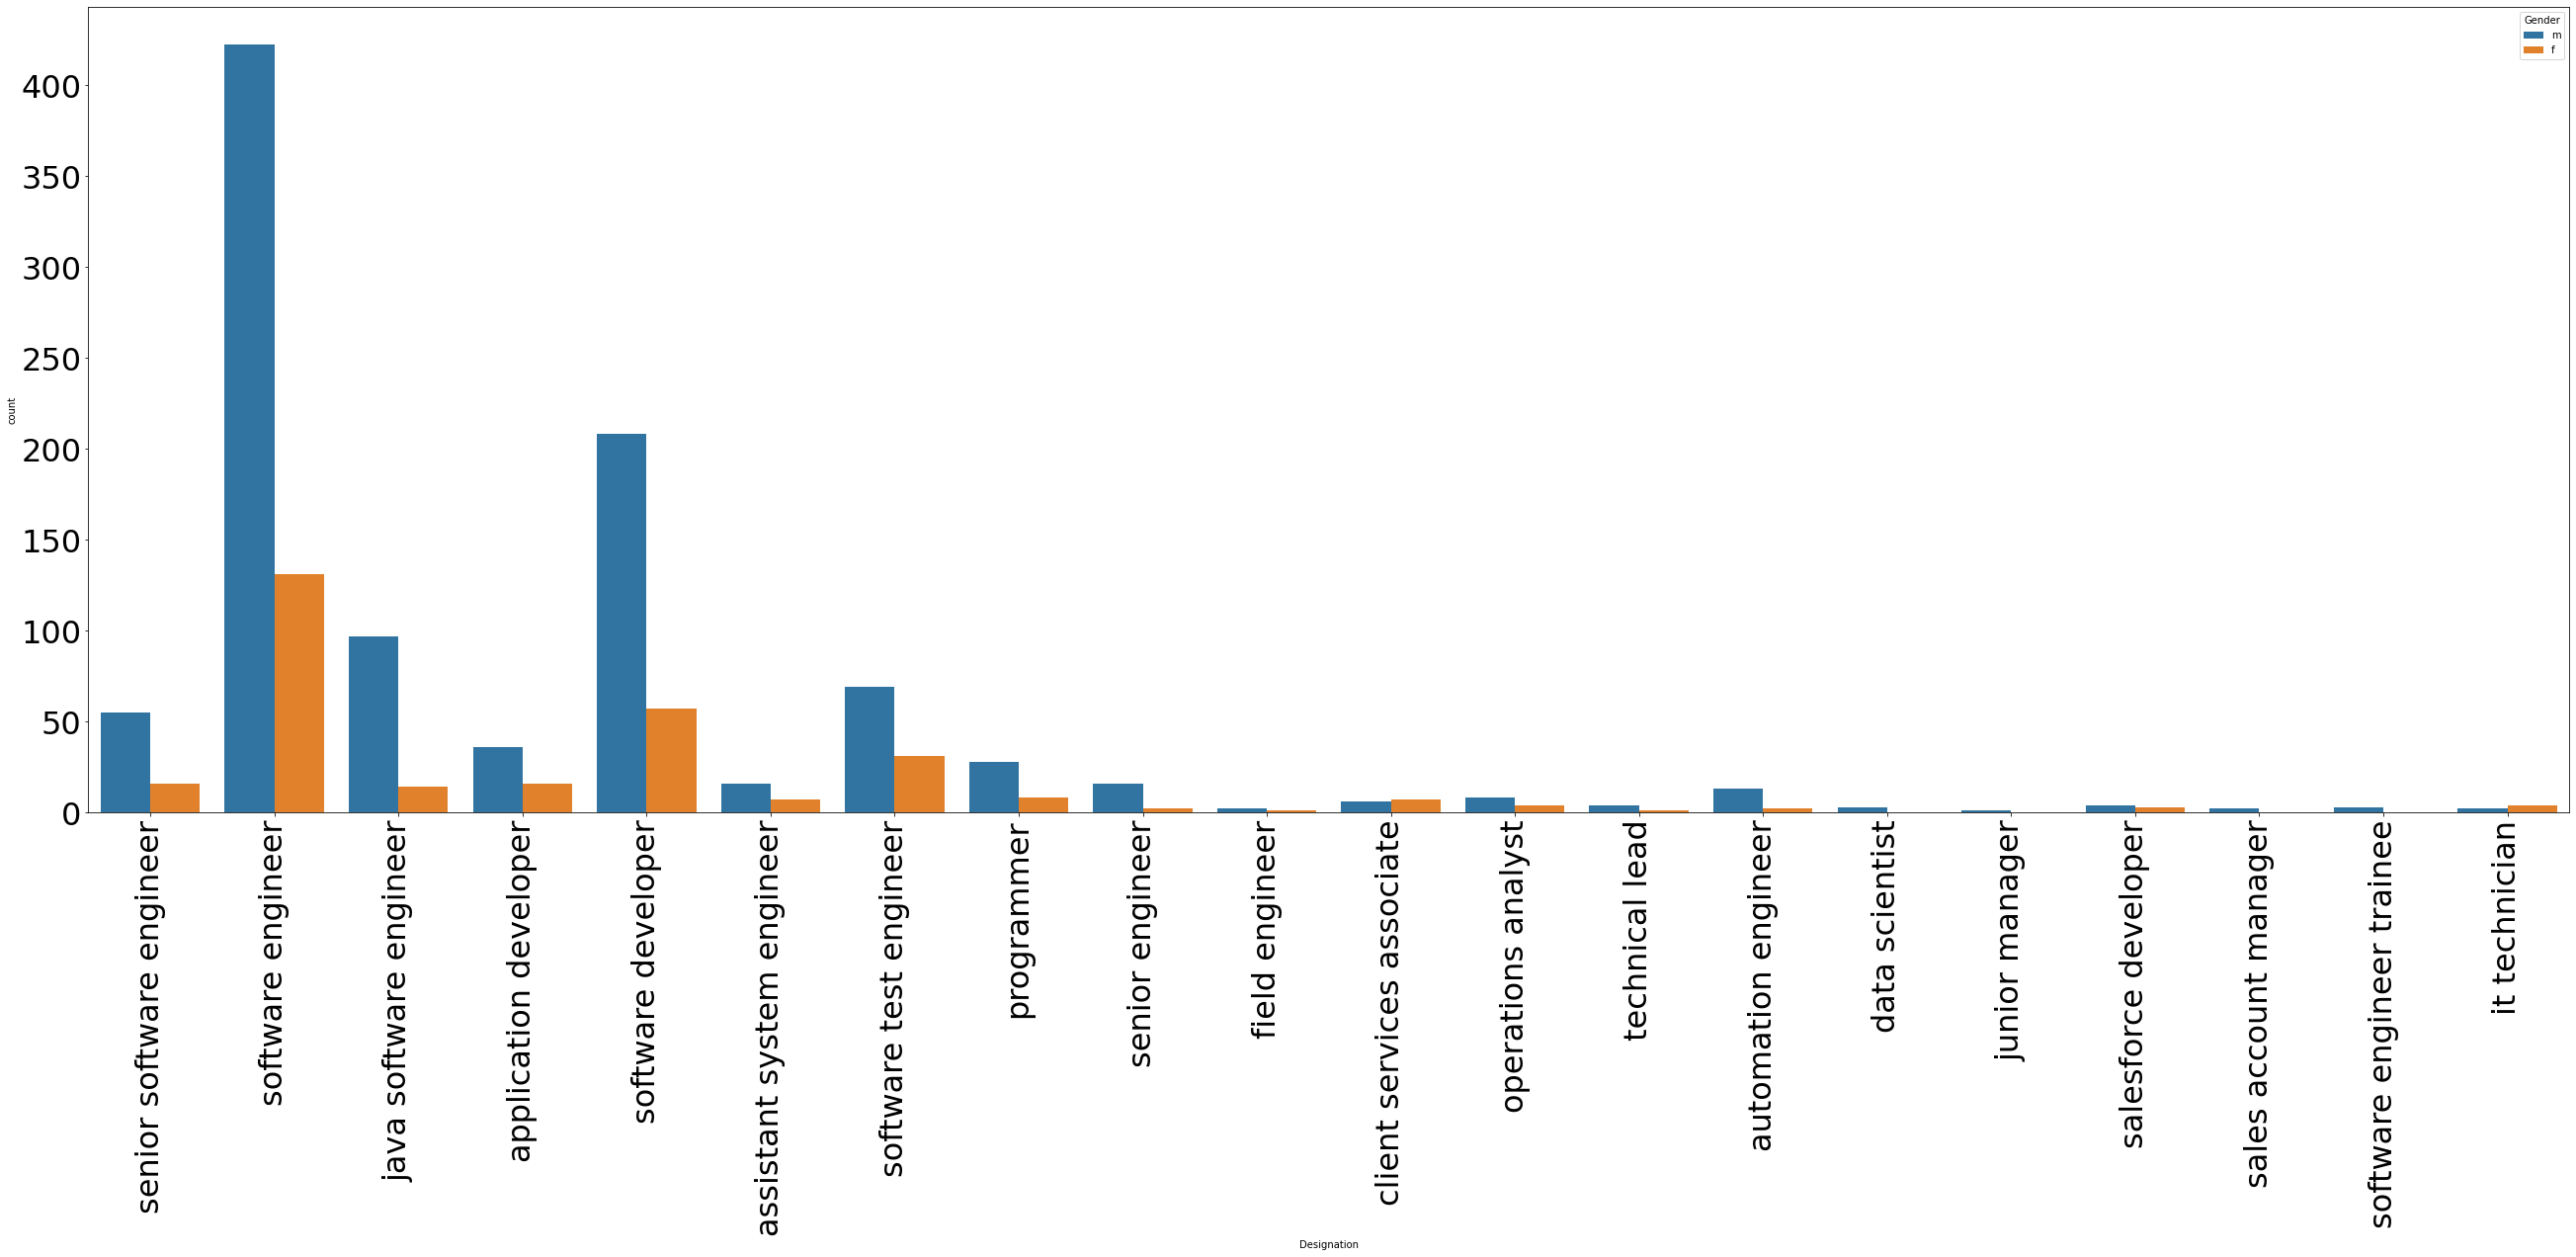

In [42]:
plt.figure(figsize=(45,15))
sns.countplot(x="Designation",hue="Gender",data=minds)
plt.xticks(fontsize=32,rotation=90)
plt.yticks(fontsize=32)

### Looking Aboove we see that in all sectors, Males aspirants higher frequencies than females and considering only females, we see that females aspirants as sw engineer have hig frequencies.


### But juts with count we cannot conclude that Soft engg fields has max salary, its juts that most of the brilliant minds are from IT Domain and mostly IT domain people prefer to specialize in AMCAt for employablity


### Lets Check the salary of these Fields via Gender.

(array([      0.,  250000.,  500000.,  750000., 1000000., 1250000.,
        1500000., 1750000., 2000000., 2250000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

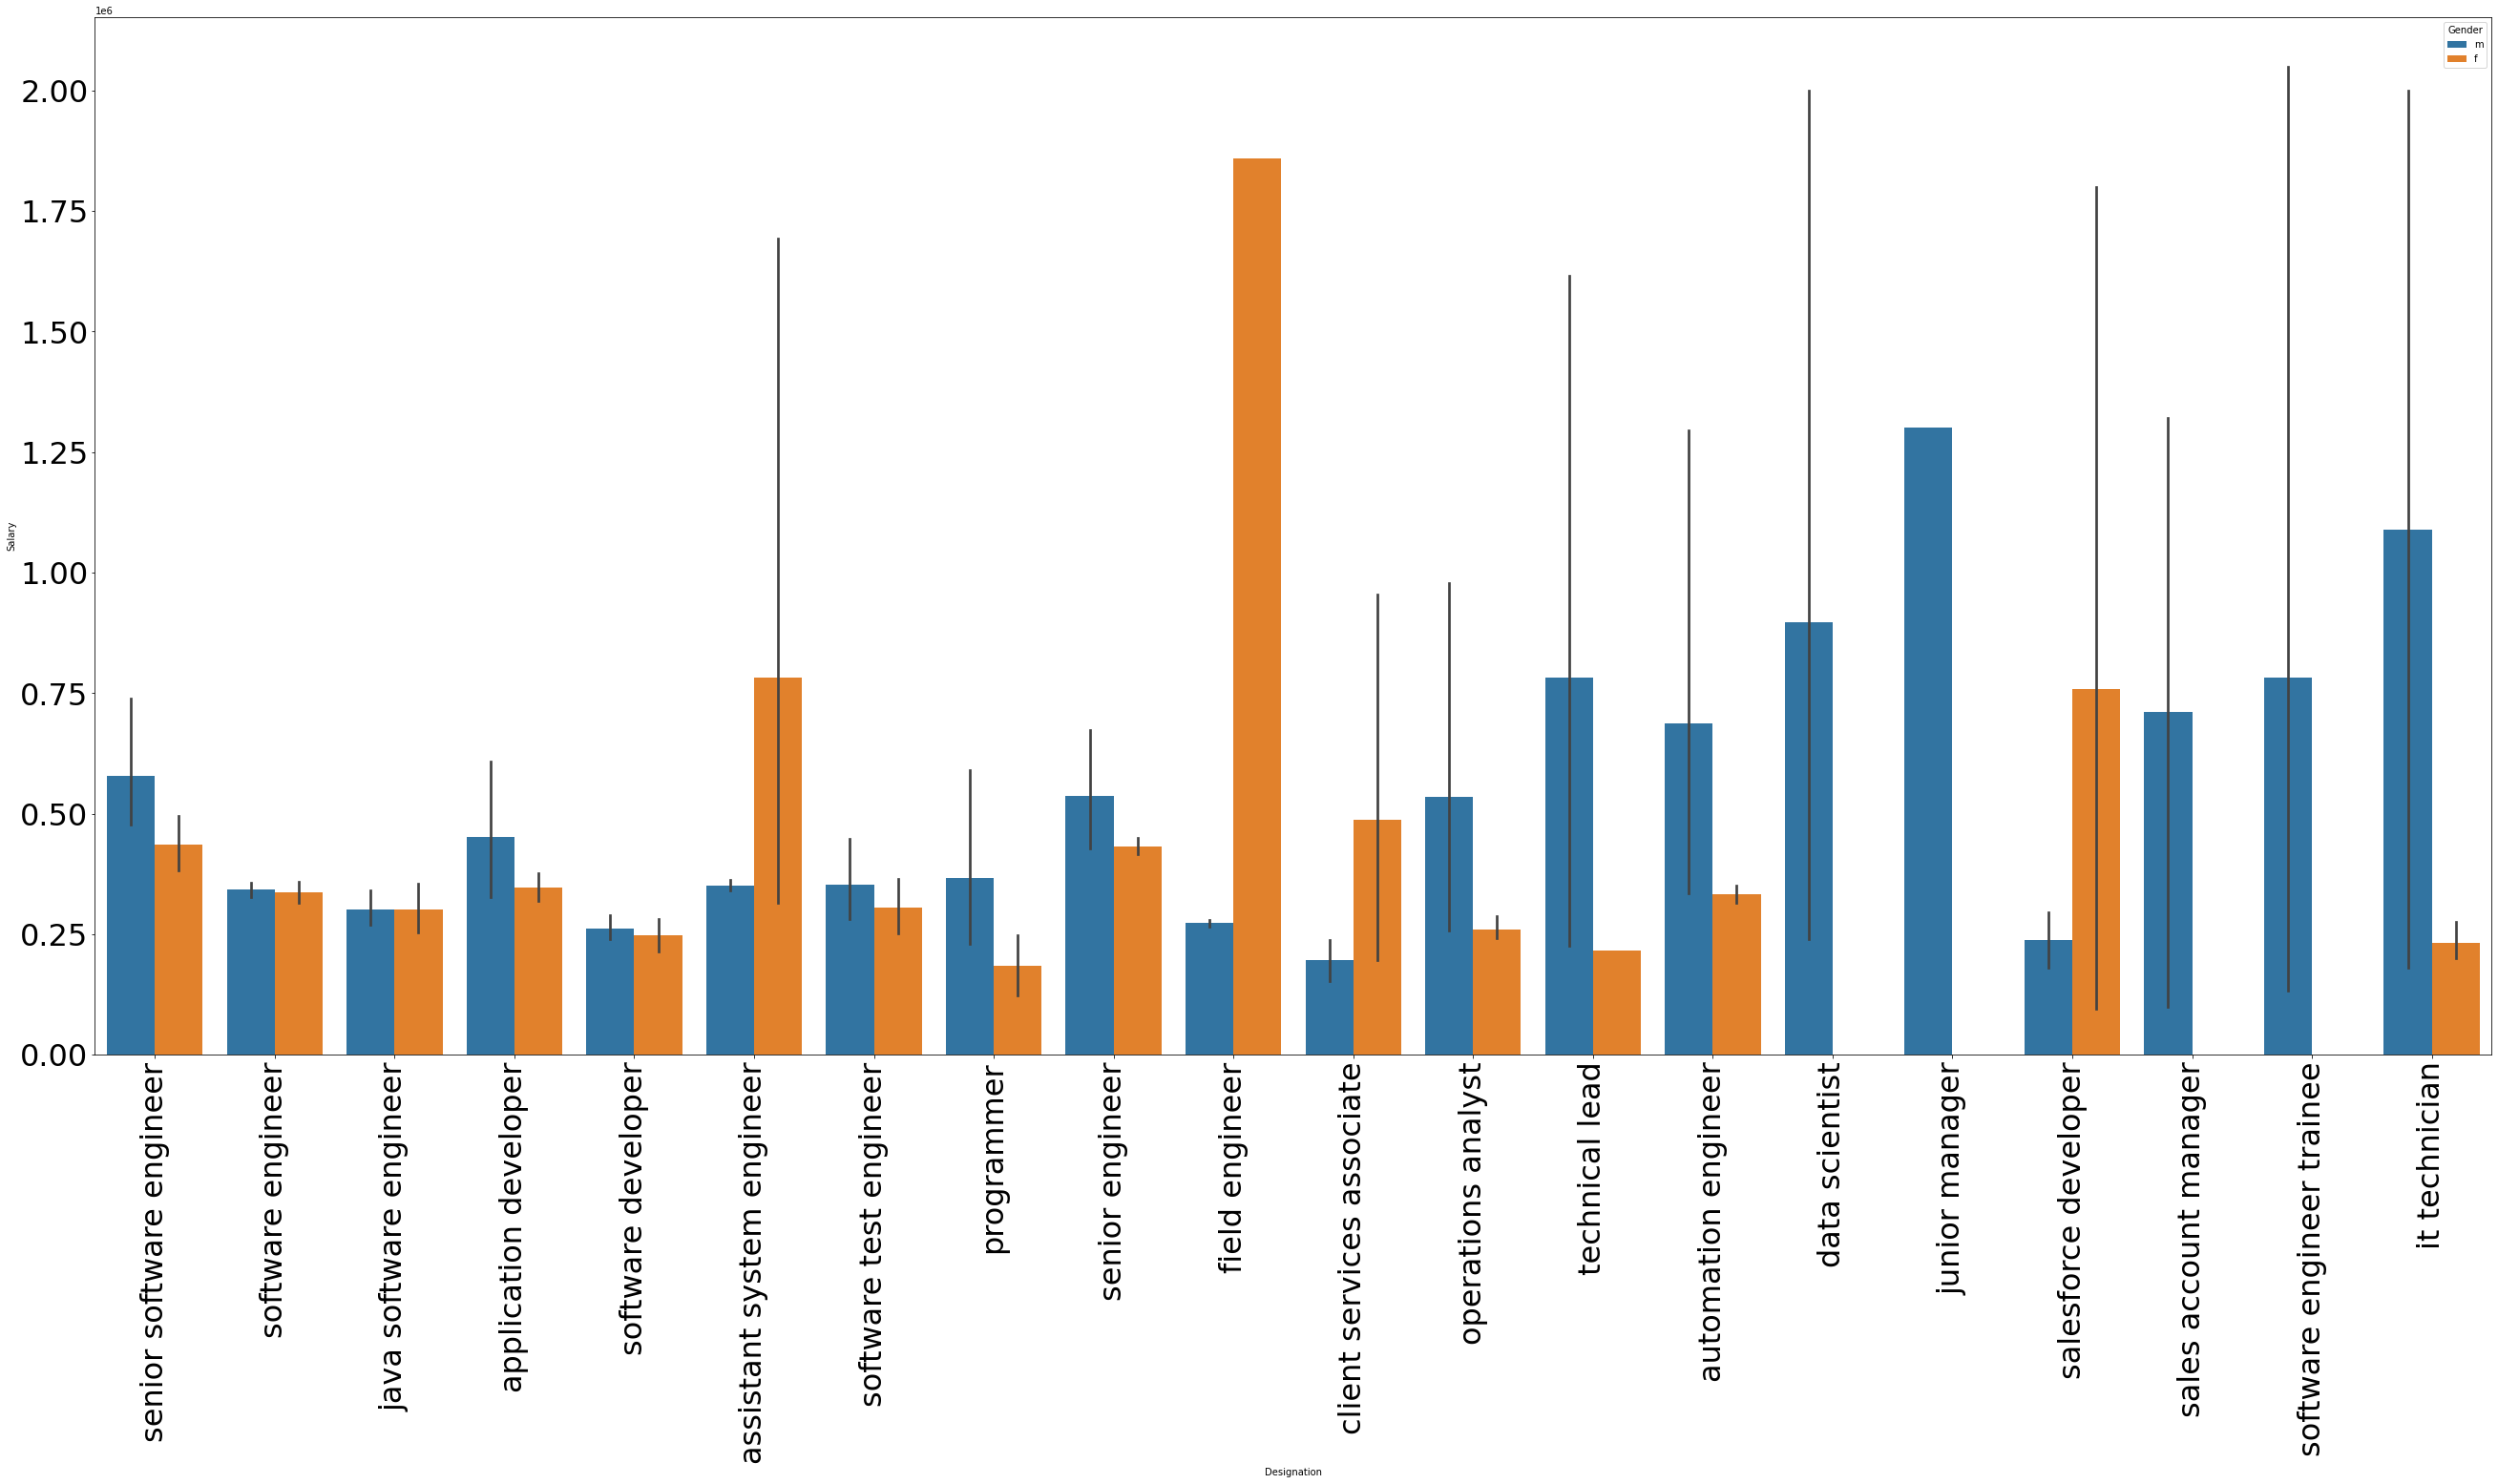

In [43]:
plt.figure(figsize=(45,20))
sns.barplot(x="Designation",y="Salary",hue="Gender",data=minds)
plt.xticks(fontsize=32,rotation=90)
plt.yticks(fontsize=32)

### From aboove we see that some fields have equal no of gender who have nearly equal salaries while some fields have males who have high salaries while some have female having high salaries. A male with proffesion as Junior manager has max salary while female with field engineer has max salary of all the fields and genders.


### SO lets Goal This and Check Why Females are given Low Salary and males Higher. Is It Bcoz of Exp,Education

### Lets Check the salary distribution for each field via histogram

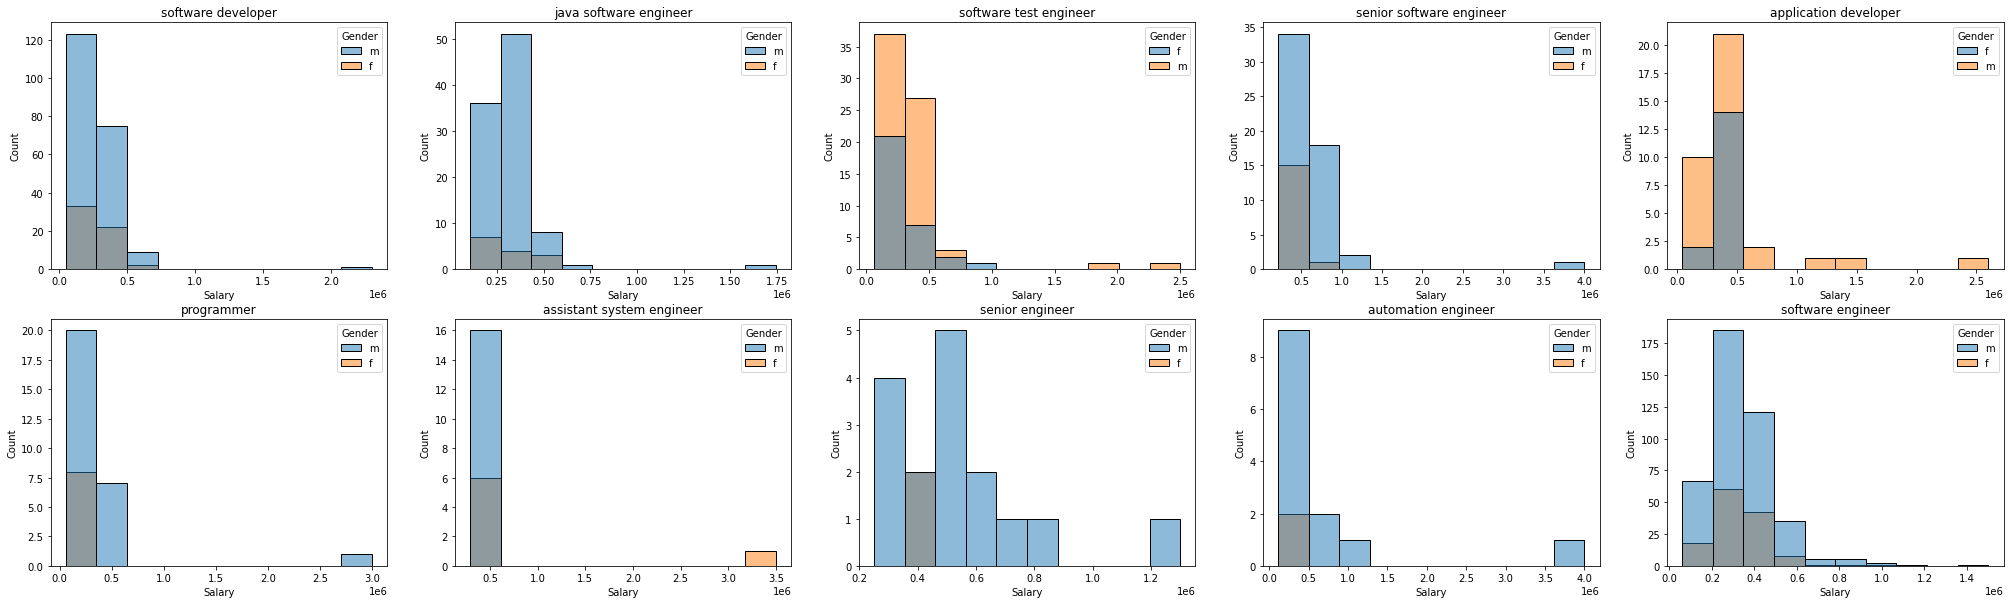

In [44]:
plt.figure(figsize=(35,10))
for j in range(len(top_20_sal_fields[:10])):
    plt.subplot(str(25)+str(j))
    sns.histplot(x="Salary",data=minds[minds["Designation"]==top_20_sal_fields[j]],bins=10,hue="Gender")
    plt.title(top_20_sal_fields[j])

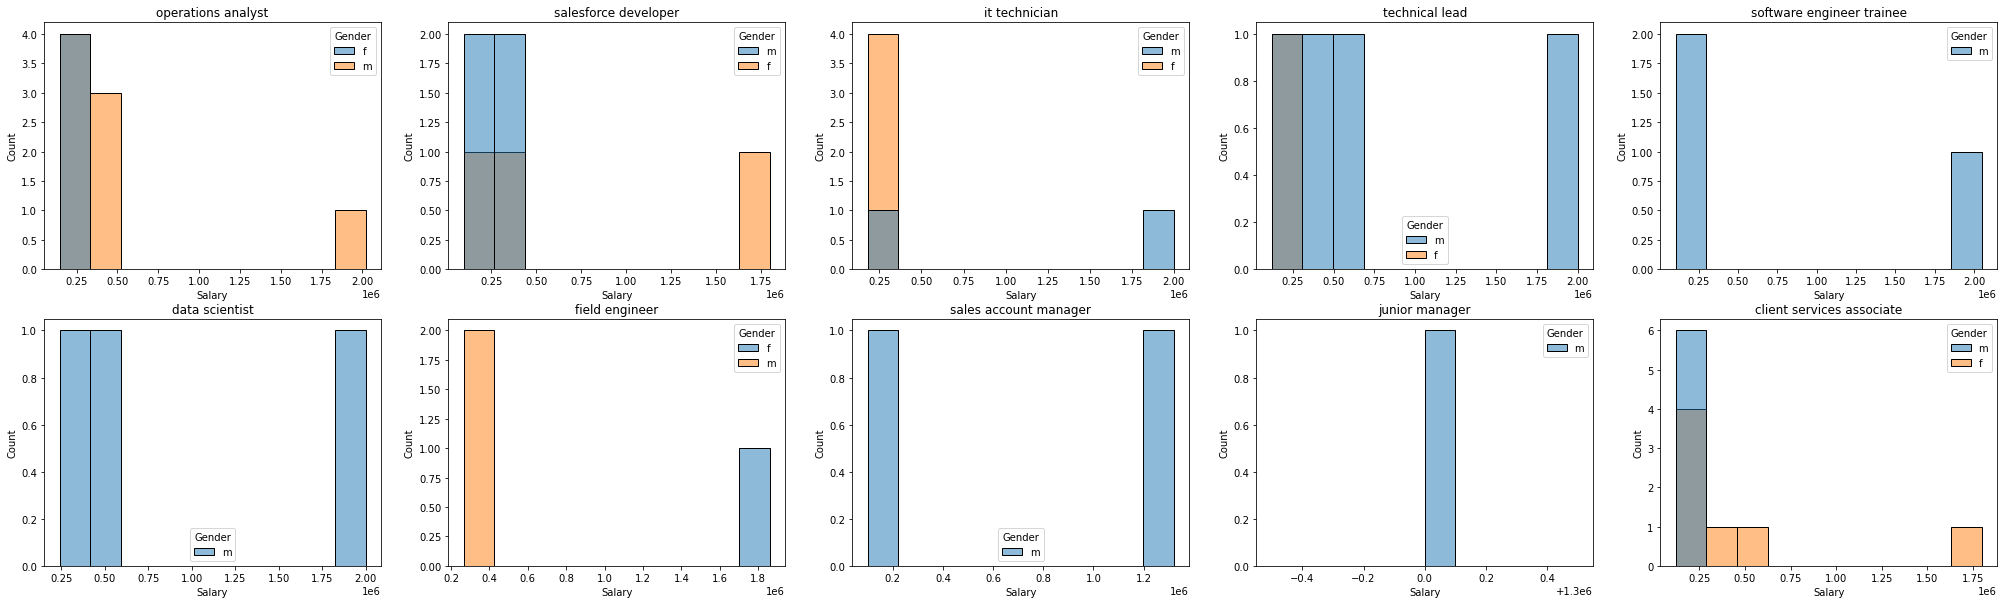

In [45]:
i=10
plt.figure(figsize=(35,10))
for j in range(len(top_20_sal_fields[10:])):
    plt.subplot(str(25)+str(j))
    sns.histplot(x="Salary",data=minds[minds["Designation"]==top_20_sal_fields[i]],bins=10,hue="Gender")
    plt.title(top_20_sal_fields[i])
    i=i+1

### Looking Over Histogram,It Looks Like All fields have starting salary in range of 250 to 500K for Most counts of Males and less count of Females. So with distribution we couldnt get much as of it. But we do know that data is skewed towards right and this means some individuals have  salary range greater than 500 K.Lets Do same with Box plot and see the median salary

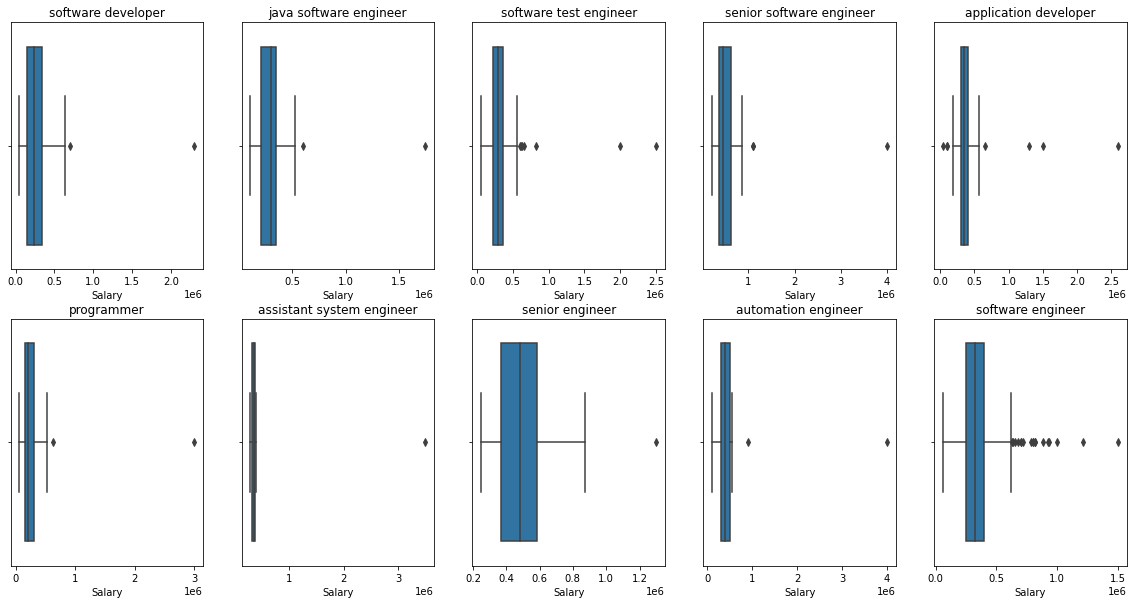

In [46]:
plt.figure(figsize=(20,10))
for j in range(len(top_20_fields[:10])):
    plt.subplot(str(25)+str(j))
    sns.boxplot(x="Salary",data=minds[minds["Designation"]==top_20_sal_fields[j]])
    plt.title(top_20_sal_fields[j])

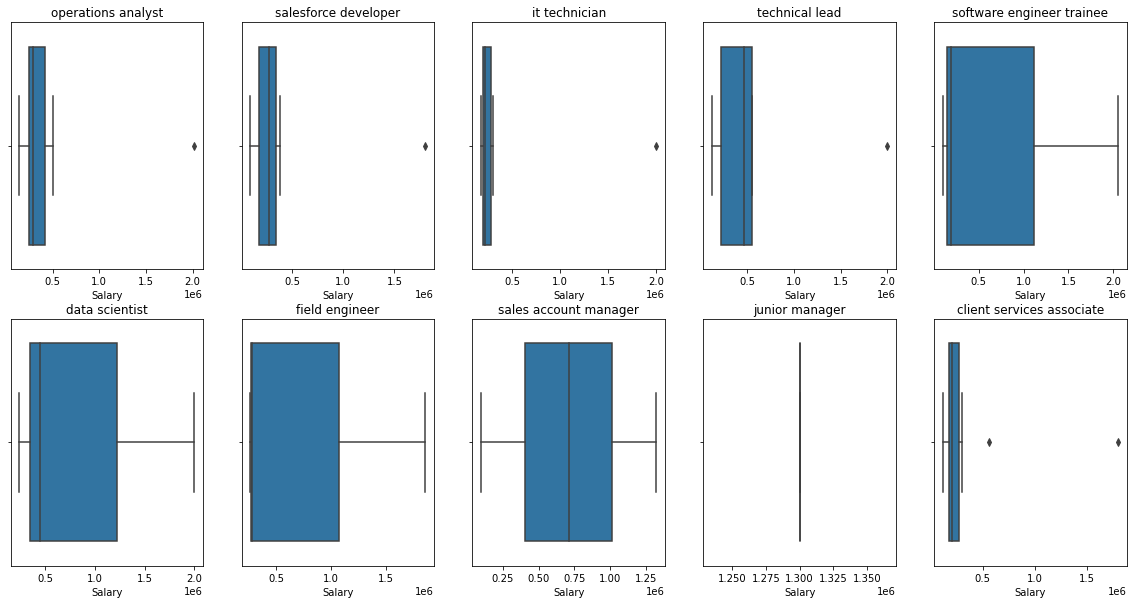

In [47]:
i=10
plt.figure(figsize=(20,10))
for j in range(len(top_20_fields[:10])):
    plt.subplot(str(25)+str(j))
    sns.boxplot(x="Salary",data=minds[minds["Designation"]==top_20_sal_fields[i]])
    plt.title(top_20_sal_fields[i])
    i=i+1

### Looking Over the box plot we see get better idea and also see the outliers which confirm that there are individuals who have salary greater than 1000K. and this outliers are acceptable. But with meadian its sure that most of them have <=500K except for sales acc manager

### Lets See same for different genders

##### For Males

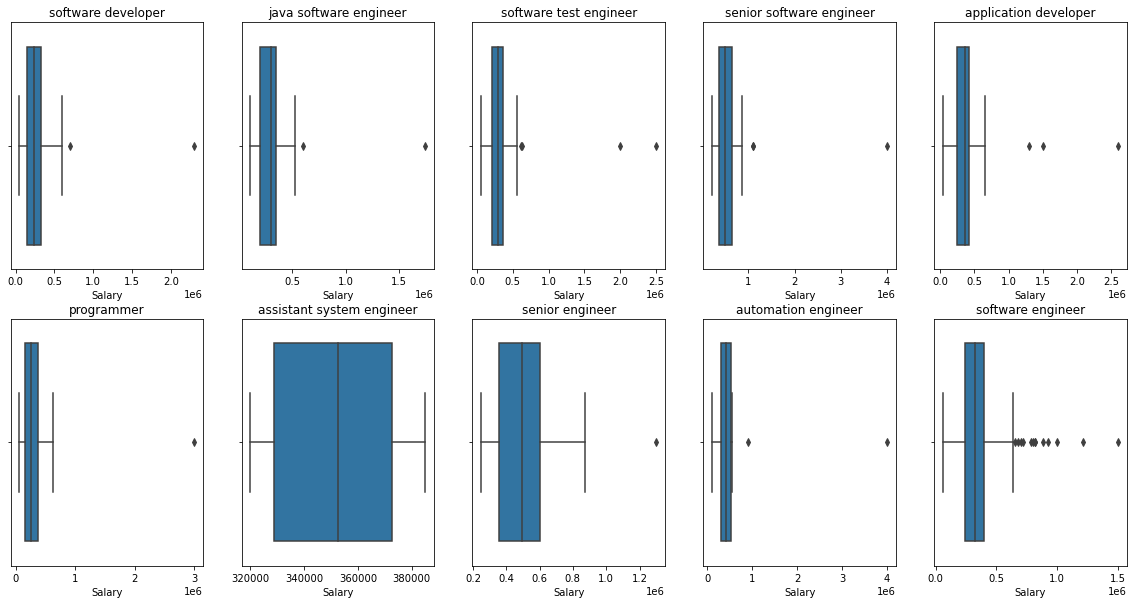

In [48]:
plt.figure(figsize=(20,10))
for j in range(len(top_20_fields[:10])):
    plt.subplot(str(25)+str(j))
    sns.boxplot(x="Salary",data=minds[(minds["Designation"]==top_20_sal_fields[j]) & (minds["Gender"]=="m")])
    plt.title(top_20_sal_fields[j])

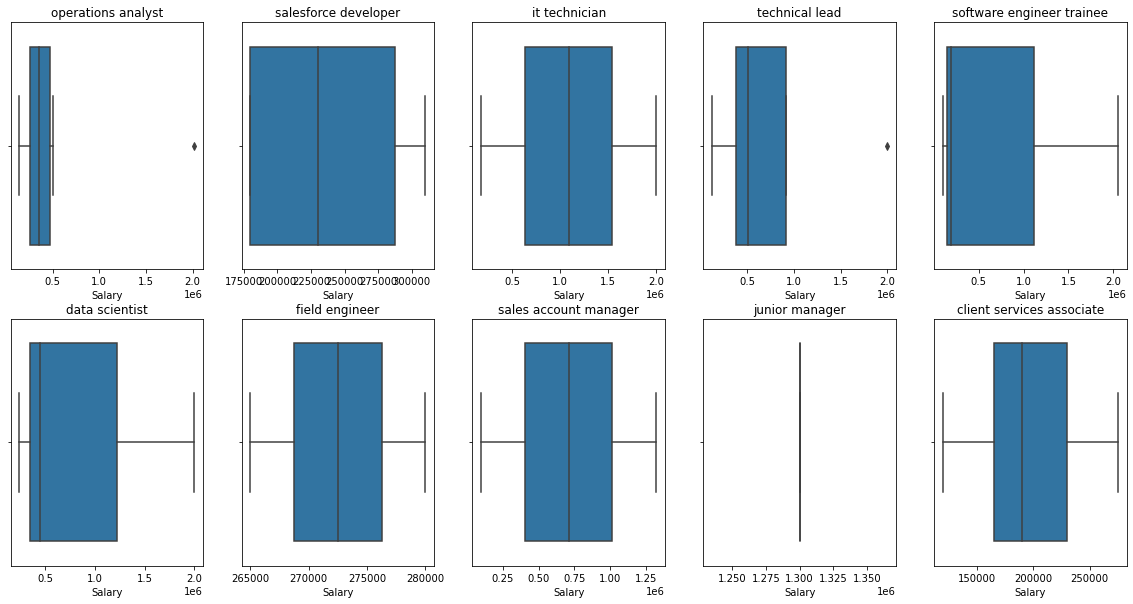

In [49]:
i=10
plt.figure(figsize=(20,10))
for j in range(len(top_20_fields[:10])):
    plt.subplot(str(25)+str(j))
    sns.boxplot(x="Salary",data=minds[(minds["Designation"]==top_20_sal_fields[i]) & (minds["Gender"]=="m")])
    plt.title(top_20_sal_fields[i])
    i=i+1

### For Males Expect for sales account manager every fields median salary is below 500K.

##### For Females

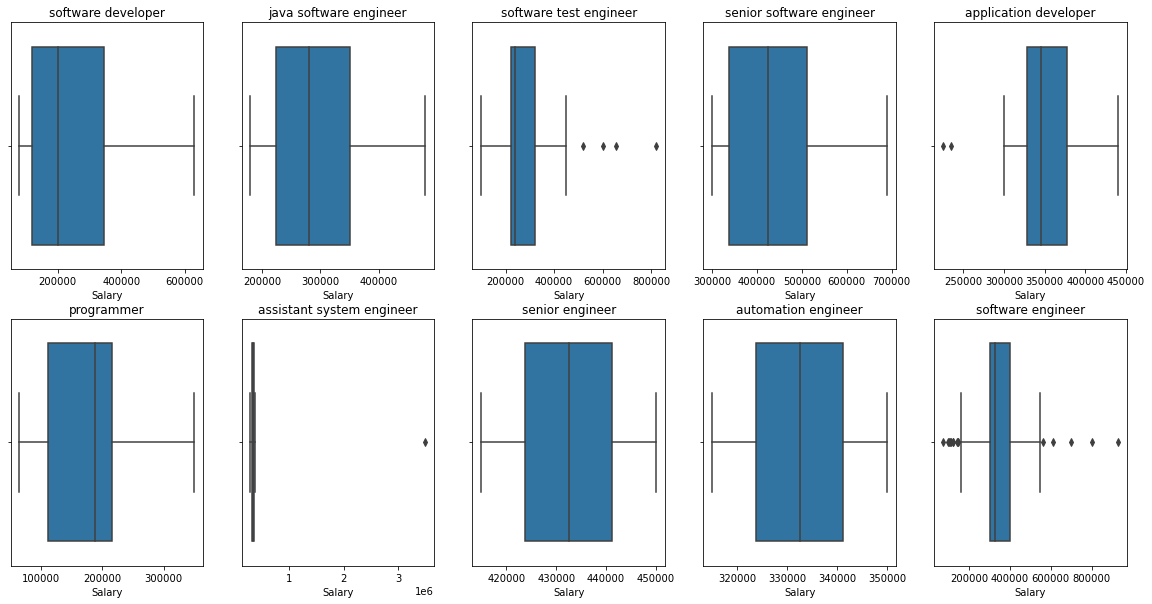

In [50]:
plt.figure(figsize=(20,10))
for j in range(len(top_20_fields[:10])):
    plt.subplot(str(25)+str(j))
    sns.boxplot(x="Salary",data=minds[(minds["Designation"]==top_20_sal_fields[j]) & (minds["Gender"]=="f")])
    plt.title(top_20_sal_fields[j])

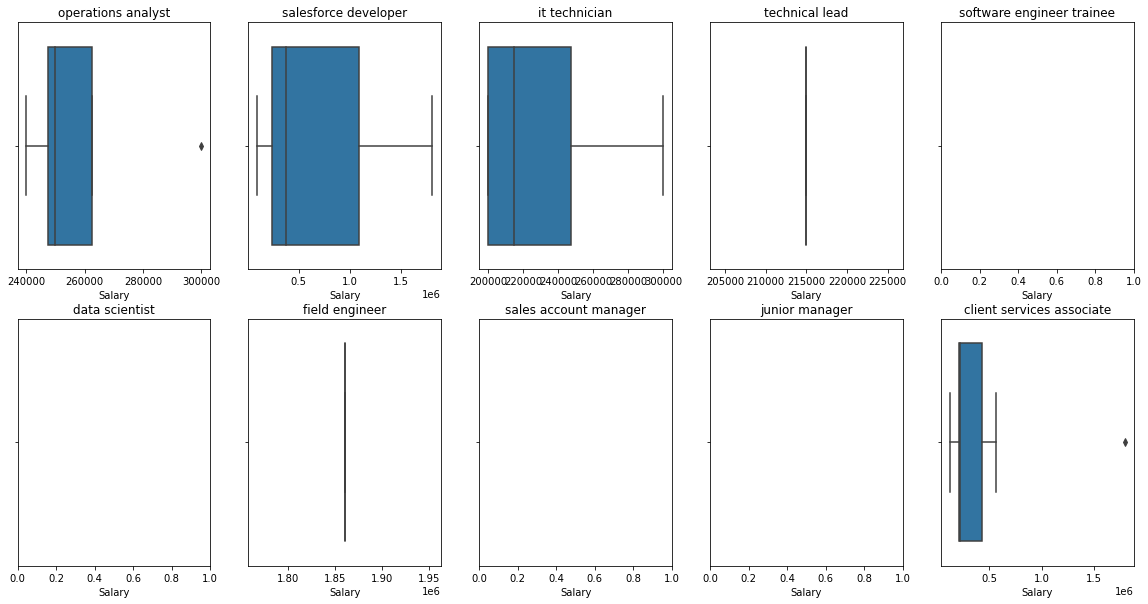

In [51]:
i=10
plt.figure(figsize=(20,10))
for j in range(len(top_20_fields[:10])):
    plt.subplot(str(25)+str(j))
    sns.boxplot(x="Salary",data=minds[(minds["Designation"]==top_20_sal_fields[i]) & (minds["Gender"]=="f")])
    plt.title(top_20_sal_fields[i])
    i=i+1

### Looking Aboove we see that males have been working in all the sectors and females are working in less less sector but both gender are having most of salaries below 500K. But unlike males females have no record in field engg,data scientist,sales,jm


### Lets Check the experiences of males and females per designation. But before that lets see median experince of people which will tell quant of engg worked

In [52]:
minds["Exp"]=pd.to_datetime(minds["DOL"]).dt.year-pd.to_datetime(minds["DOJ"]).dt.year

<AxesSubplot:xlabel='Designation'>

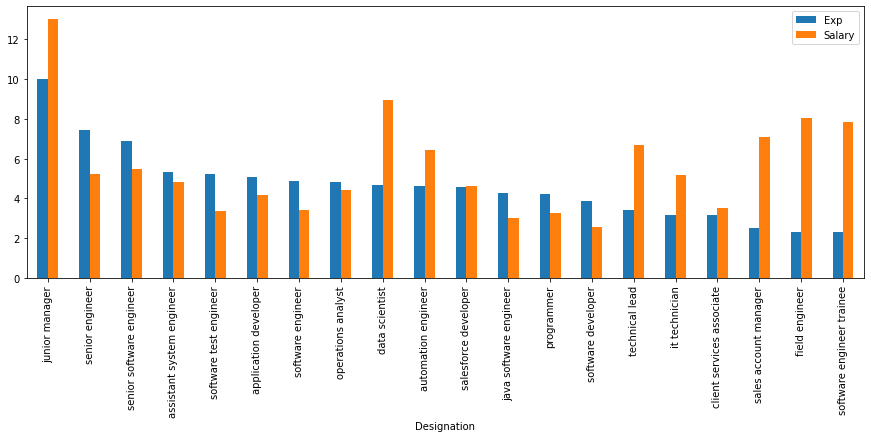

In [53]:
minds["Salary"]=minds["Salary"].apply(lambda x:x/100000)
minds.groupby("Designation")[["Exp","Salary"]].mean().sort_values("Exp",ascending=False).plot(kind="bar",figsize=(15,5))

### From aboove we see that Jr manager Is The Only One Who Has Max Salary and Experince and while for other fields we can infer that If the Experince is between 5 and 7 then the salary will be in between 3 to 5 Lakhs But here looking over it looks like more than exp salary depends on Proffesion.

### Lets See Who Has More Experince males or females

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

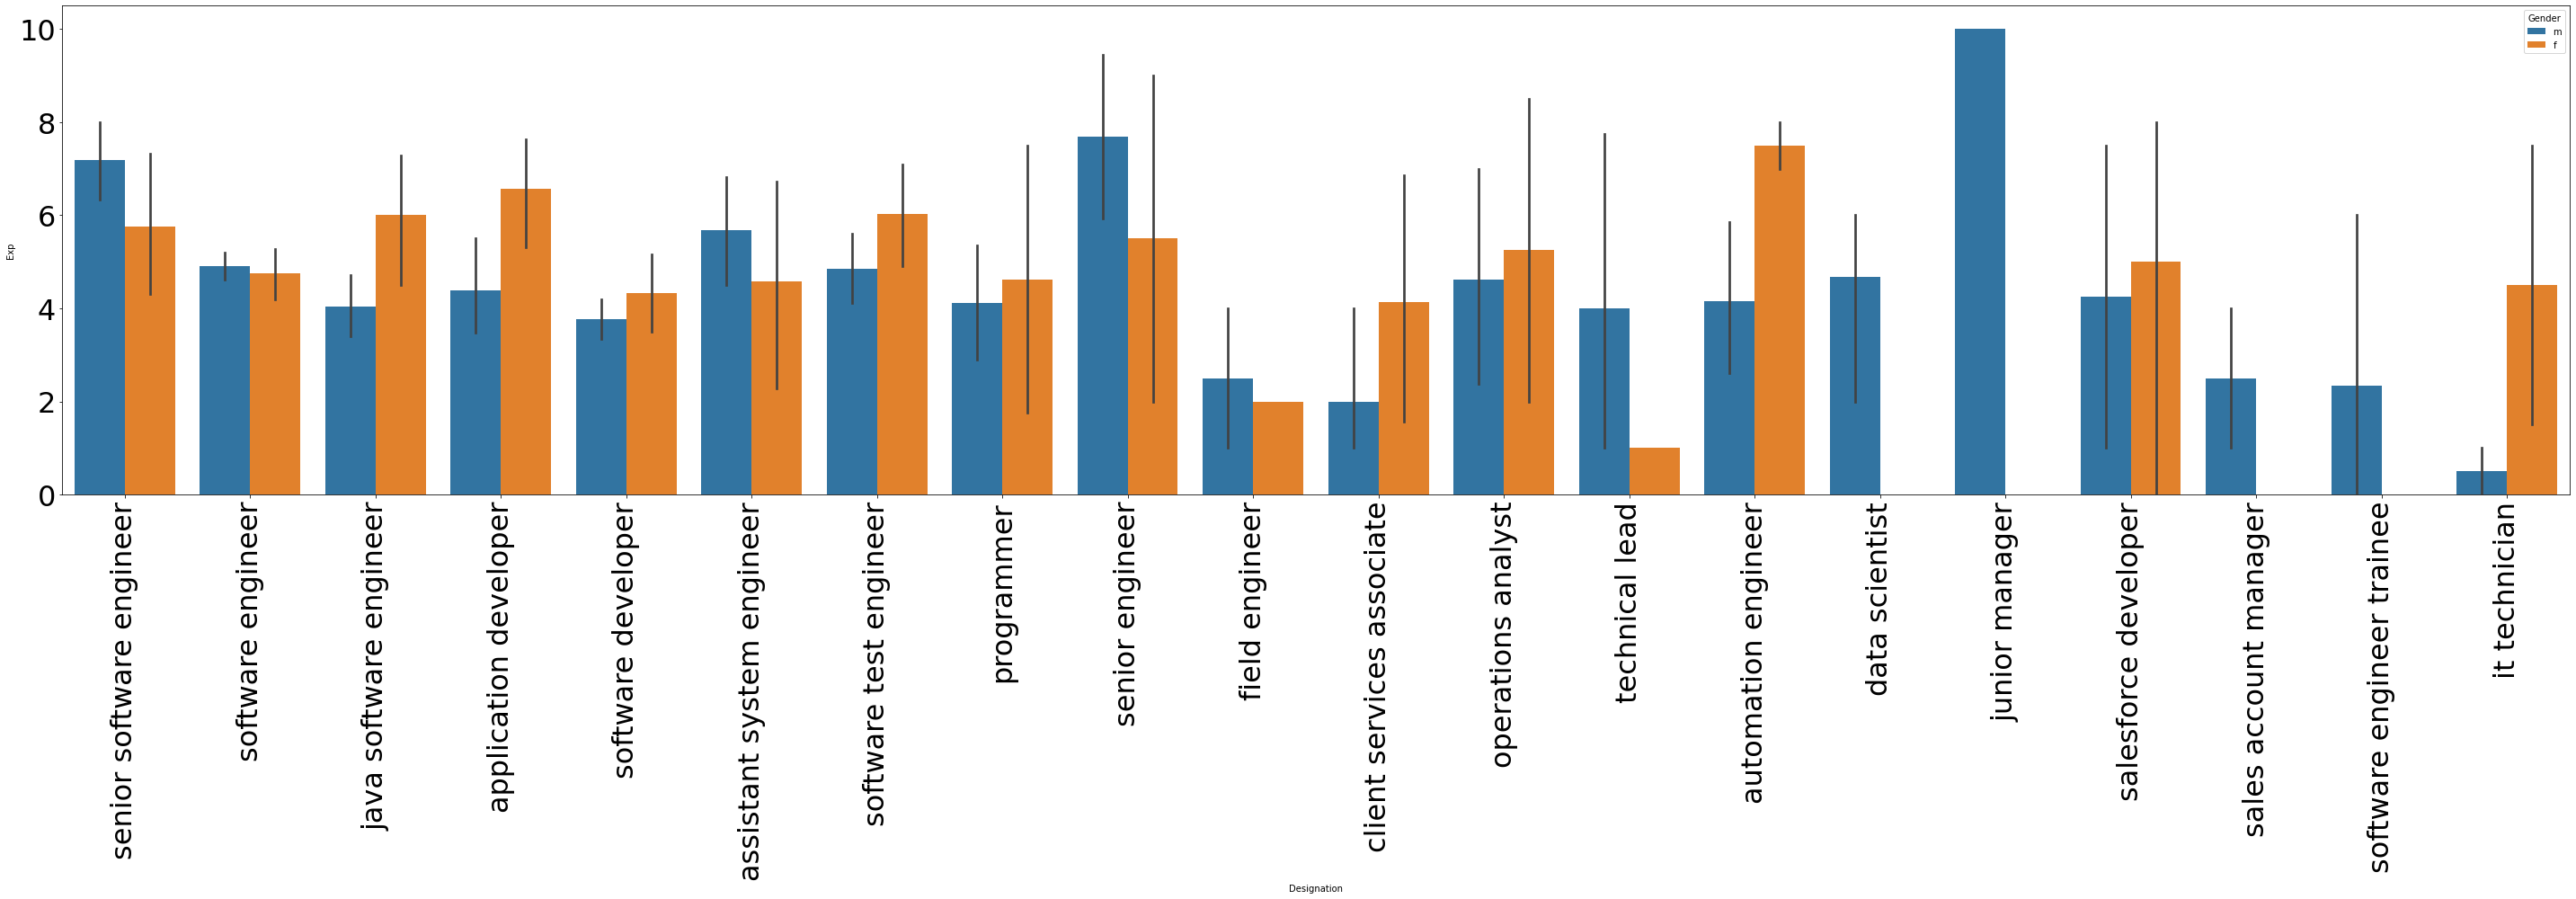

In [54]:
plt.figure(figsize=(50,10))
sns.barplot(x="Designation",y="Exp",hue="Gender",data=minds)
plt.xticks(fontsize=32,rotation=90)
plt.yticks(fontsize=32)

### From Aboove we see that Jr manager Male has more experince and the one having highest salary as manager is a male but lets break this into exp count per designation and plot histogram

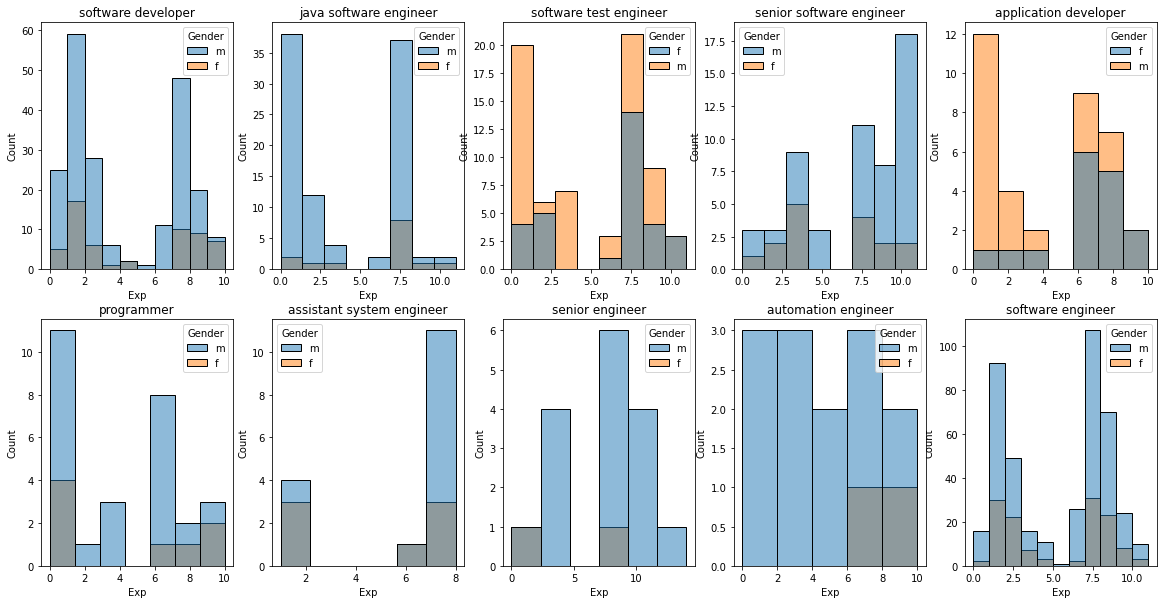

In [55]:
plt.figure(figsize=(20,10))
for j in range(len(top_20_fields[:10])):
    plt.subplot(str(25)+str(j))
    sns.histplot(x="Exp",data=minds[(minds["Designation"]==top_20_sal_fields[j])],hue="Gender")
    plt.title(top_20_sal_fields[j])

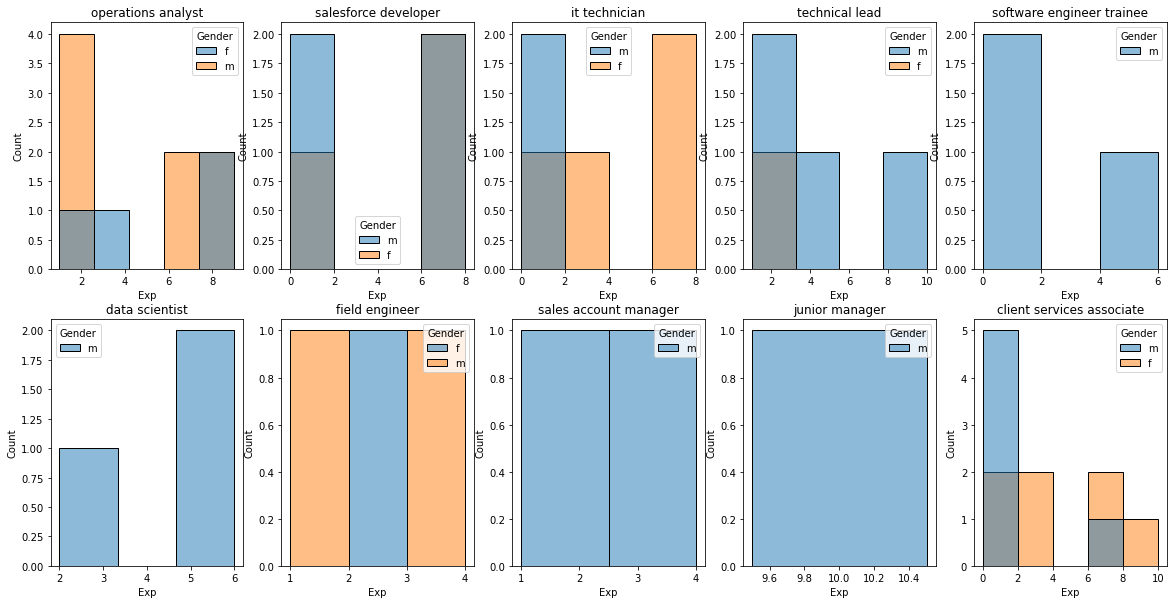

In [56]:
plt.figure(figsize=(20,10))
i=10
for j in range(len(top_20_fields[:10])):
    plt.subplot(str(25)+str(j))
    sns.histplot(x="Exp",data=minds[(minds["Designation"]==top_20_sal_fields[i])],hue="Gender")
    plt.title(top_20_sal_fields[i])
    i+=1

### So Nothing As Such New and Histogram is Giving same results as barplot just difference is that it gives us better idea than barplot and gives us frequency of exp with different designation for males and females.

### So from Aboove like we saw in barplot Some Designations Have Females having high exp while some have males but the common inference we can verify is as Sw enginners have high frquency thier exp count is also high and sw devs are second highest they are second highest in freq

### Lets Check Exp and Age wrt to Salaries and check the relation

### In Salary comparison between males and females we saw that,  Jr Manager As Male Was Second Highest in Salaray and that was bcoz he has exp of 10 yrs but max salary was of female field engineer and looking at the exp comparision,it looks like female Fields engineers with less experince have high salary and . Lets Compare different columns to understand the salary behaviour

<AxesSubplot:xlabel='collegeGPA', ylabel='Salary'>

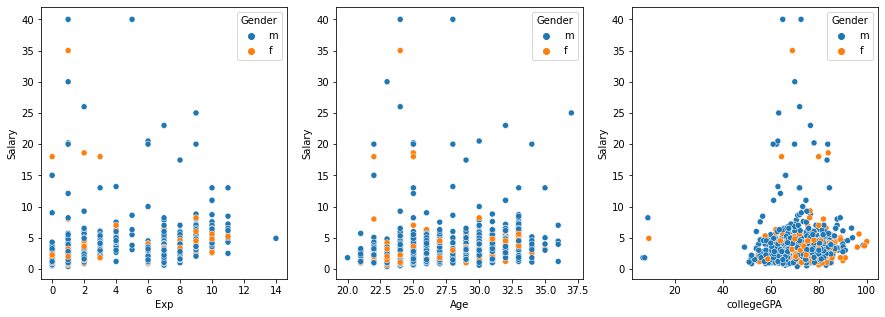

In [57]:
minds["Age"]=pd.to_datetime(minds["DOL"]).dt.year-pd.to_datetime(minds["DOB"]).dt.year
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.scatterplot(x="Exp",y="Salary",data=minds,hue="Gender")
plt.subplot(132)
sns.scatterplot(x="Age",y="Salary",data=minds,hue="Gender")
plt.subplot(133)
sns.scatterplot(x="collegeGPA",y="Salary",data=minds,hue="Gender")

### Looking at the scatter plot it can be said that as the xperince exceeds beneath 5 for Males,The salary increases for some males while for females it declines as the experince increases. Thats why we could infer that females having high salary in Field engineering have have exp <5 while for males with exp < 5 have salary <5. Same for automation engg where females have high exp, their salary <5 while for males who have high salary in automation engg have exp >5. Mostly it looks like this is the pattern but would add this to that Salary also depends on type of proffesion.

### Looking Here it Looks Like as the exp increases for males the salary increases so similarly as the age increases or after 25 the salary for males tend to rise and for females after 25 the salary declines.

### From GPA we see that most of the aspirants have GPA of 50% and mostly collegeGPA has low impact on salary. I could be like Grades dont Matter.


### Lets Look Salary By Jib City like which State offers more salary

(array([ 0.,  5., 10., 15., 20., 25.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

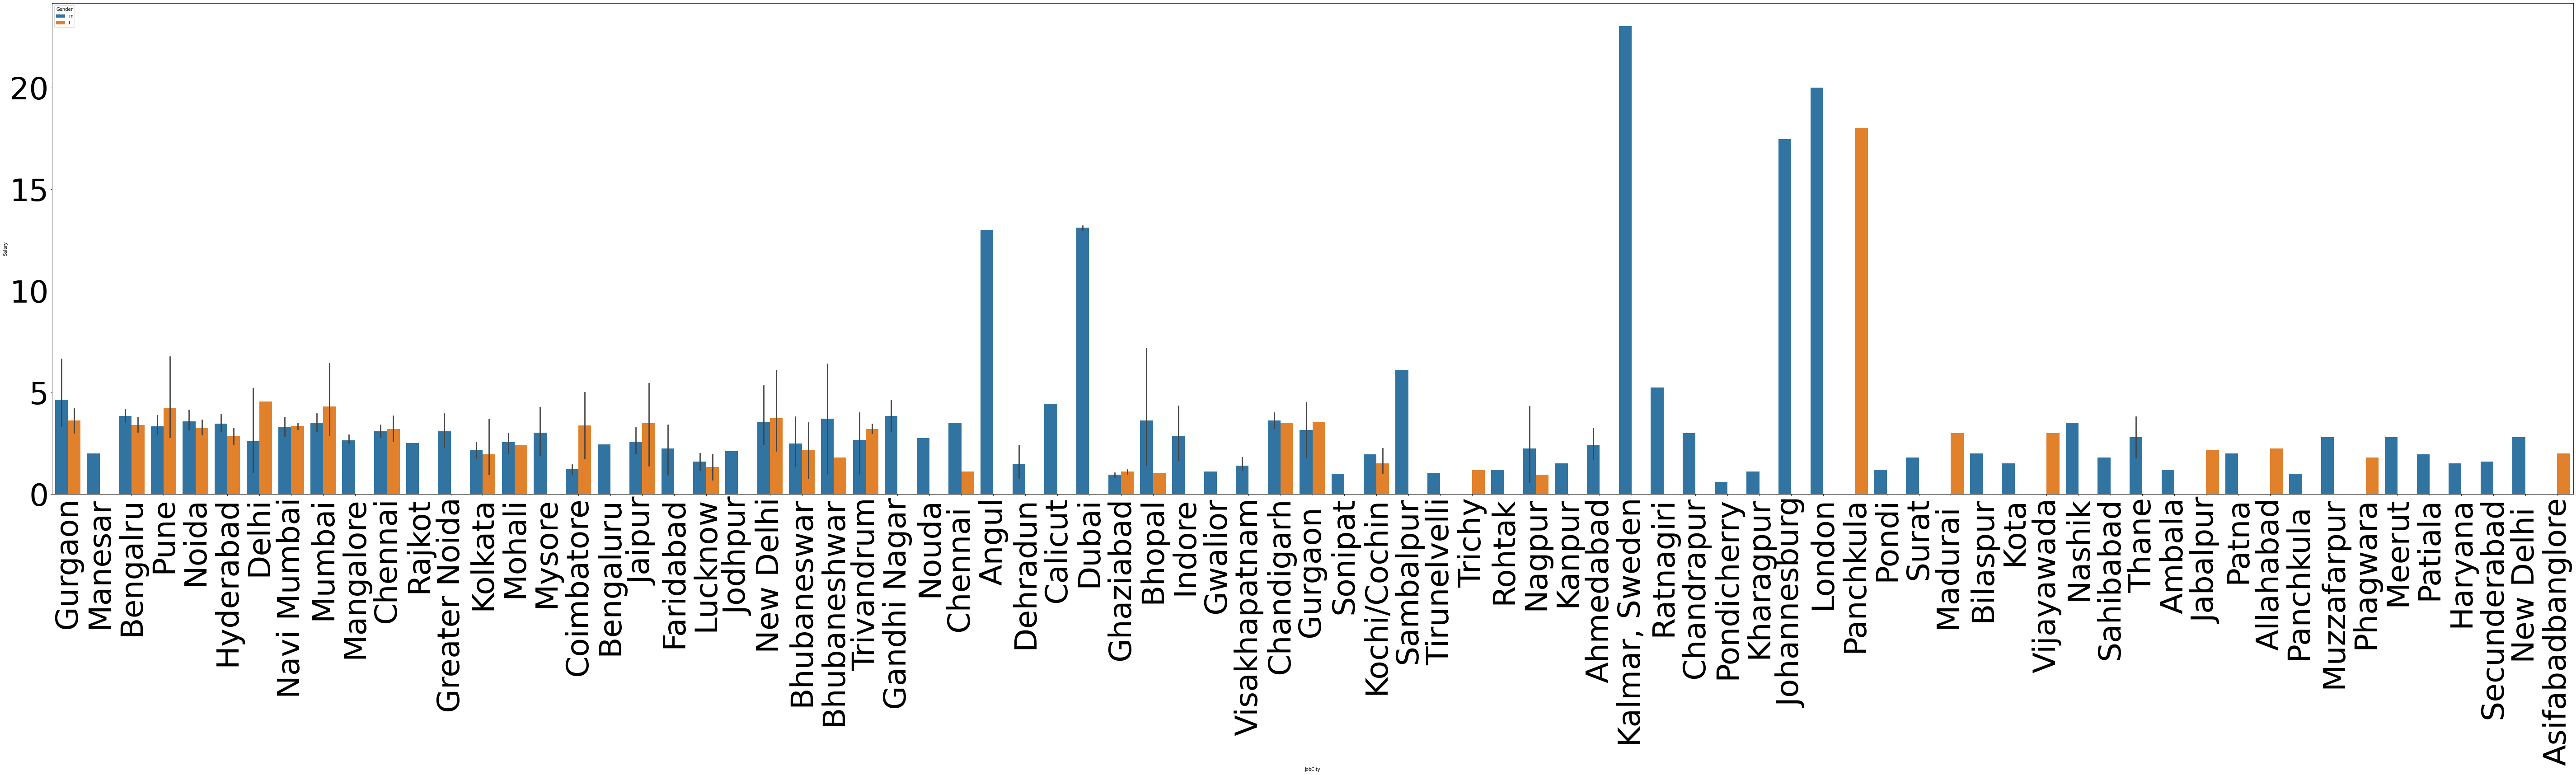

In [58]:
plt.figure(figsize=(100,20))
sns.barplot(x="JobCity",y="Salary",hue="Gender",data=minds)
plt.xticks(fontsize=68,rotation=90)
plt.yticks(fontsize=68)

### Looking aboove It Looks Like The Max salary is offered out from  Sweden

### So far We Saw What relation Designation,exp,Age,GPA has with salary by gender, And we understood that Most Aspirants are Males from IT Domain and Sw engineers. But for Salary test for below.

- Salary(Less and More Than 1 lakh) vs Specialization
- Salary(Less and More Than 1 lakh) vs Gender
- Salary(Less and More Than 1 lakh) vs Degree
- <font color="red">Salary(Less and More Than 1 lakh) vs Desig</font>
- <font color="red">Salary(Less and More Than 1 lakh) vs JobCity</font>
- <font color="red">Salary(Less and More Than 1 lakh) vs GPA</font>
- <font color="red">Salary(Less and More Than 1 lakh) vs Experince</font>
- <font color="red">Salary(Less and More Than 1 lakh) vs Age</font>

# Also Do N-way annova test for aboove where we check impact on salary

### Lets Compare Age For different designations via gender but lets see what age all designations have.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

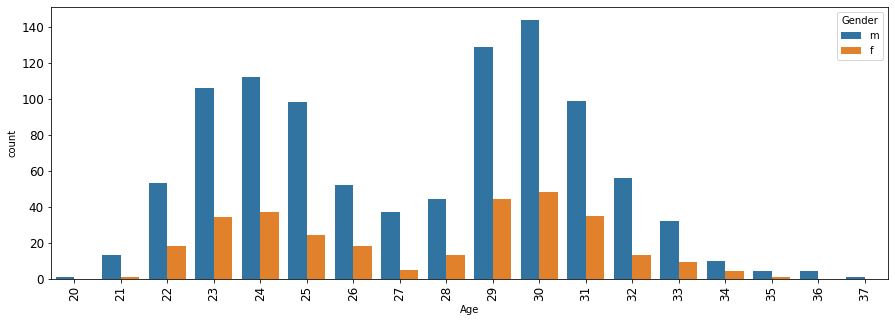

In [59]:
plt.figure(figsize=(15,5))
sns.countplot(x="Age",hue="Gender",data=minds)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)

### We See that most of the aspirants are in range of 29 to31 and looking aboove 31 is highest and they might be Male Sw engineers with Exp of 5 yrs and salary around 500K. But Still Lets Look The Age ranges by different designation.

### But for instance like we compared salary lets check age range for all designations.

### So Lets Now Plot Age Ranges for different designations by Gender

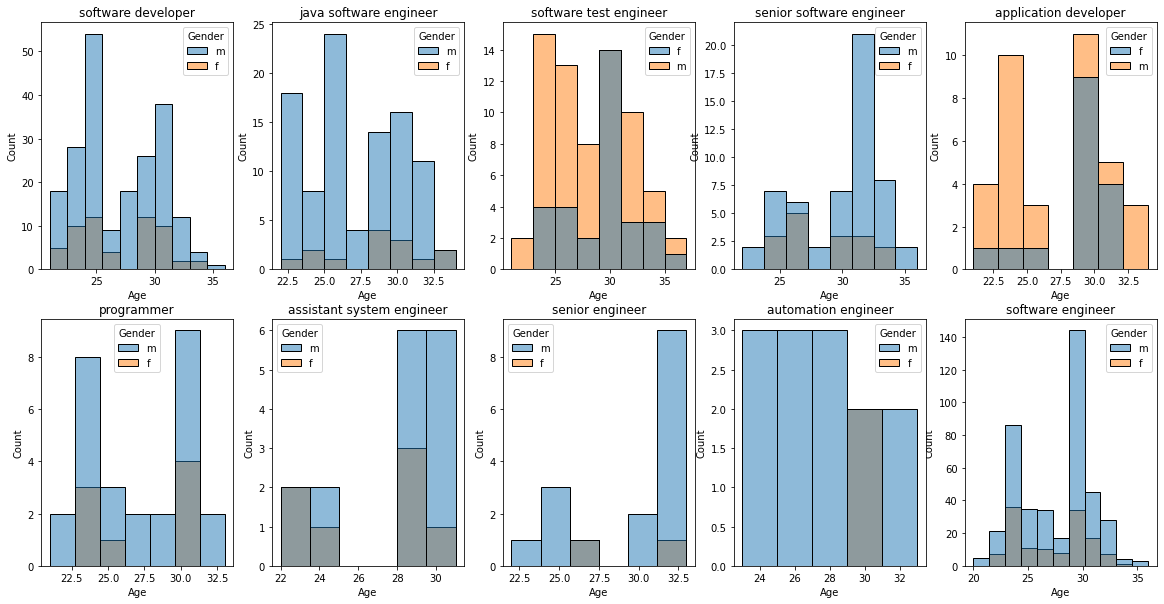

In [60]:
plt.figure(figsize=(20,10))
for j in range(len(top_20_fields[:10])):
    plt.subplot(str(25)+str(j))
    sns.histplot(x="Age",data=minds[(minds["Designation"]==top_20_sal_fields[j])],hue="Gender")
    plt.title(top_20_sal_fields[j])

### From histograms we observer that some fields have 22 as max age while some have 25 while some have max age range in 30-32 age so the range we can say is mostly 25 to 30 where we can some ages less than 25 while some ages more than 30. But Comapring with Barplot we see that We get more clear and accurate idea of age and i.e 29 to 31 where 30 is max with desig sw engg and males and most of the aspirants are sw engg and males. So we can say that The Sw engineers who have Exp of around 5yrs and Salary around 300 K they are in age range of 21 to 31 most of them in thier 30's. Lets Verify

In [61]:
minds[(minds["Age"].isin(range(35))) & (minds["Salary"].isin(range(4))) & (minds["Exp"].isin(range(5)))]["Designation"].mode()

0    software engineer
dtype: object

### Yes we were correct but not 100% as this is just assumed range and since most aspirants are sw engineers but that doesnt mean other designation may not come it can as they are also next top after sw engg but the bottom line is Due to high frequency if sw engineers we can say that surely that the avg age of sw engineers is near 30's.Lets verify

In [62]:
for i,j in zip(minds[minds["Designation"]=="software engineer"][["Age","Salary","Exp"]].mean().index.to_list(),minds[minds["Designation"]=="software engineer"][["Age","Salary","Exp"]].mean().to_list()):
    print(f"Average {i} is {round(j)}")

Average Age is 27
Average Salary is 3
Average Exp is 5


### So from aboove as we see the age is not 30 but near to it. If we see precisely 27 is avereage age and by histogram most of them are in 30's.

### Lets Find What Specializations did they have.

<AxesSubplot:>

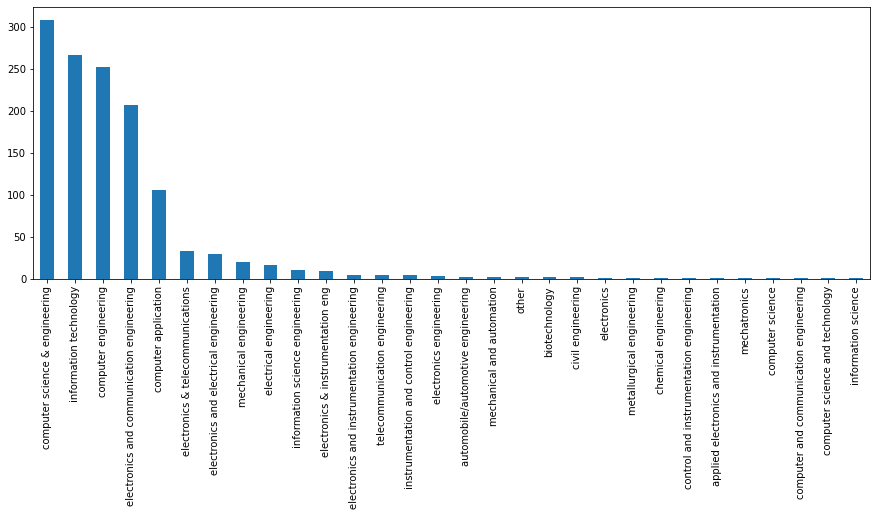

In [63]:
minds["Specialization"].value_counts().plot(kind="bar",figsize=(15,5))

### From aboove we see that top 3 Are from IT DOmain. Now lets Check Via gender

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

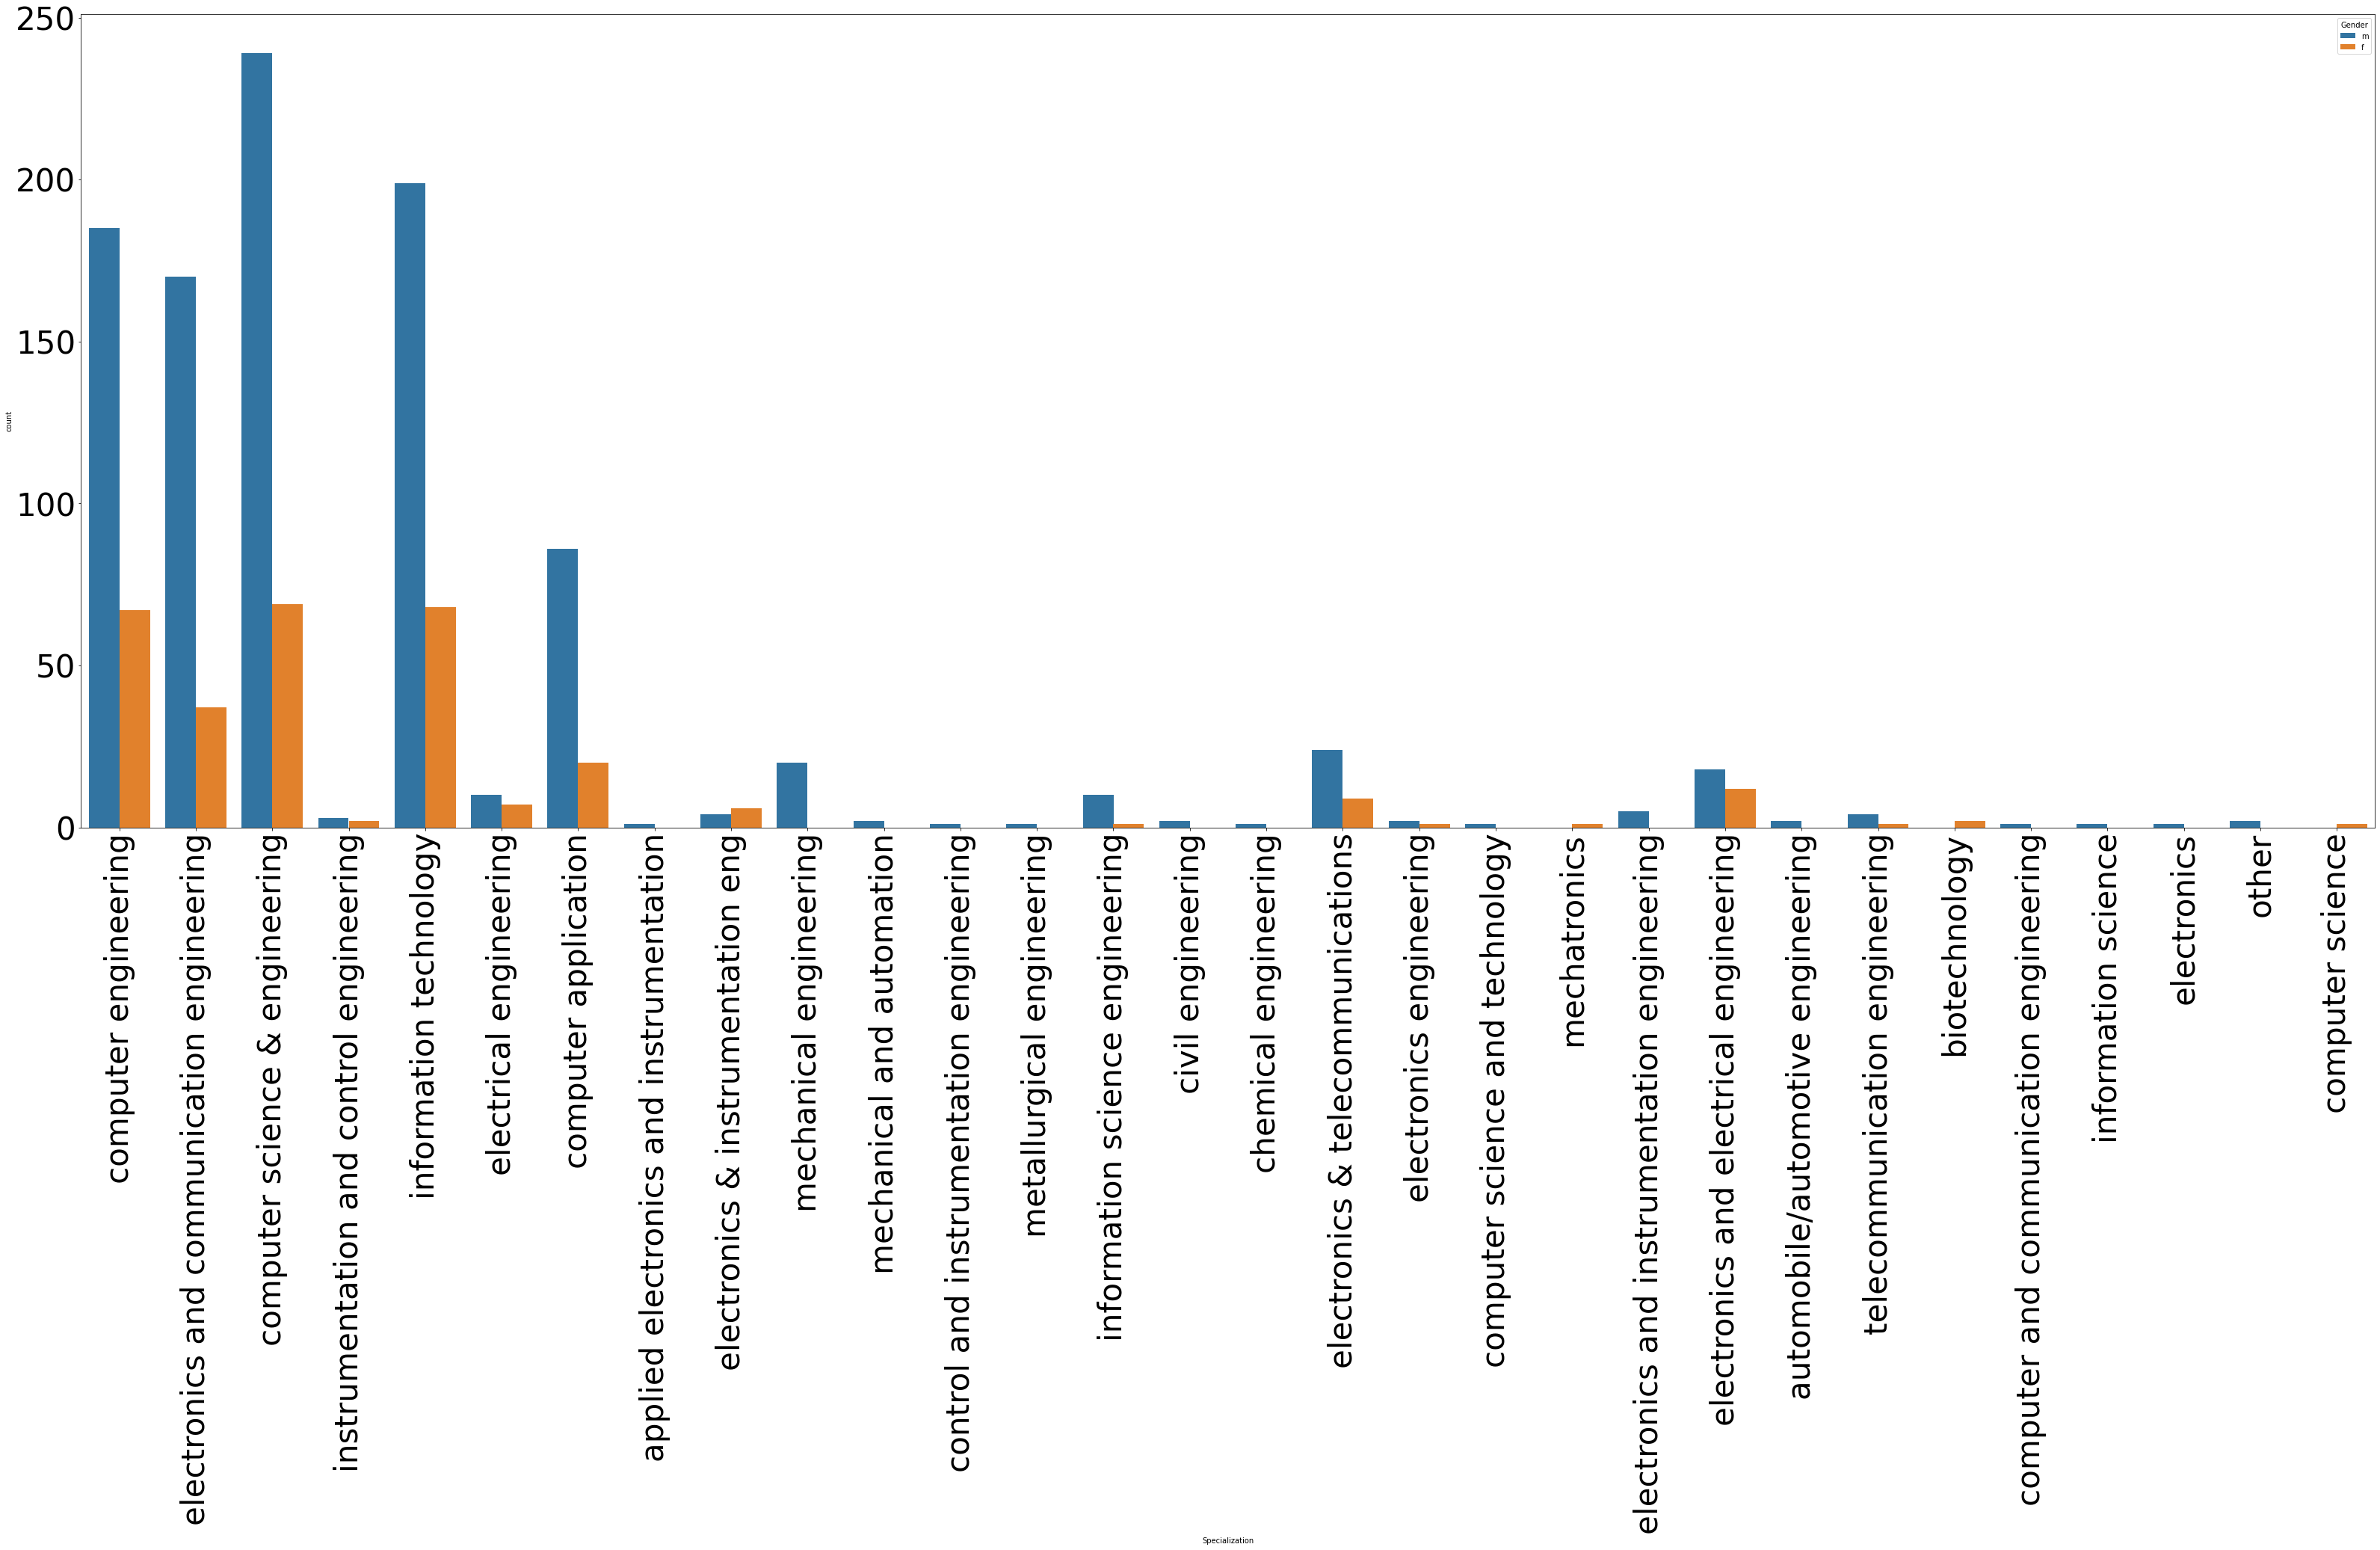

In [64]:
plt.figure(figsize=(55,20))
sns.countplot(x="Specialization",hue="Gender",data=minds)
plt.xticks(fontsize=42,rotation=90)
plt.yticks(fontsize=42)

### From aboove we see that From all sectors majority of the Aspirants are males and it can be said that males and females both opting for amcat then maybe they are from IT Domain while from other domain it Looks Like either males or females apply. But Males have high frequency over Females in IT Domain as well as other secotors

### Lets Check the Degree

<AxesSubplot:xlabel='Degree', ylabel='count'>

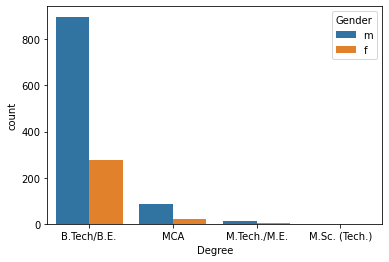

In [65]:
sns.countplot(x="Degree",hue="Gender",data=minds)

### Looking Over The Degree We See that Most of The Aspirants have B.E Degree and In That Too Males have Higher Frequency.

### So we can conclude That Since the aspirants majorly are Males and belong to IT Department Mostly With Max Education Of BE,We Have Infered That In IT Department Majority Of Aspirants are Software Engineers With Average Salary of 300K with 5 Yrs exp. As Per Salary The Highest is earned by It Technician But Has Less experince than Sw engineers. The field which has maximum experience is sr .Sw engineer But salary is more than sw engineer and less than IT technician. 


### Lets See Whether The IT Domain falls in BE or not


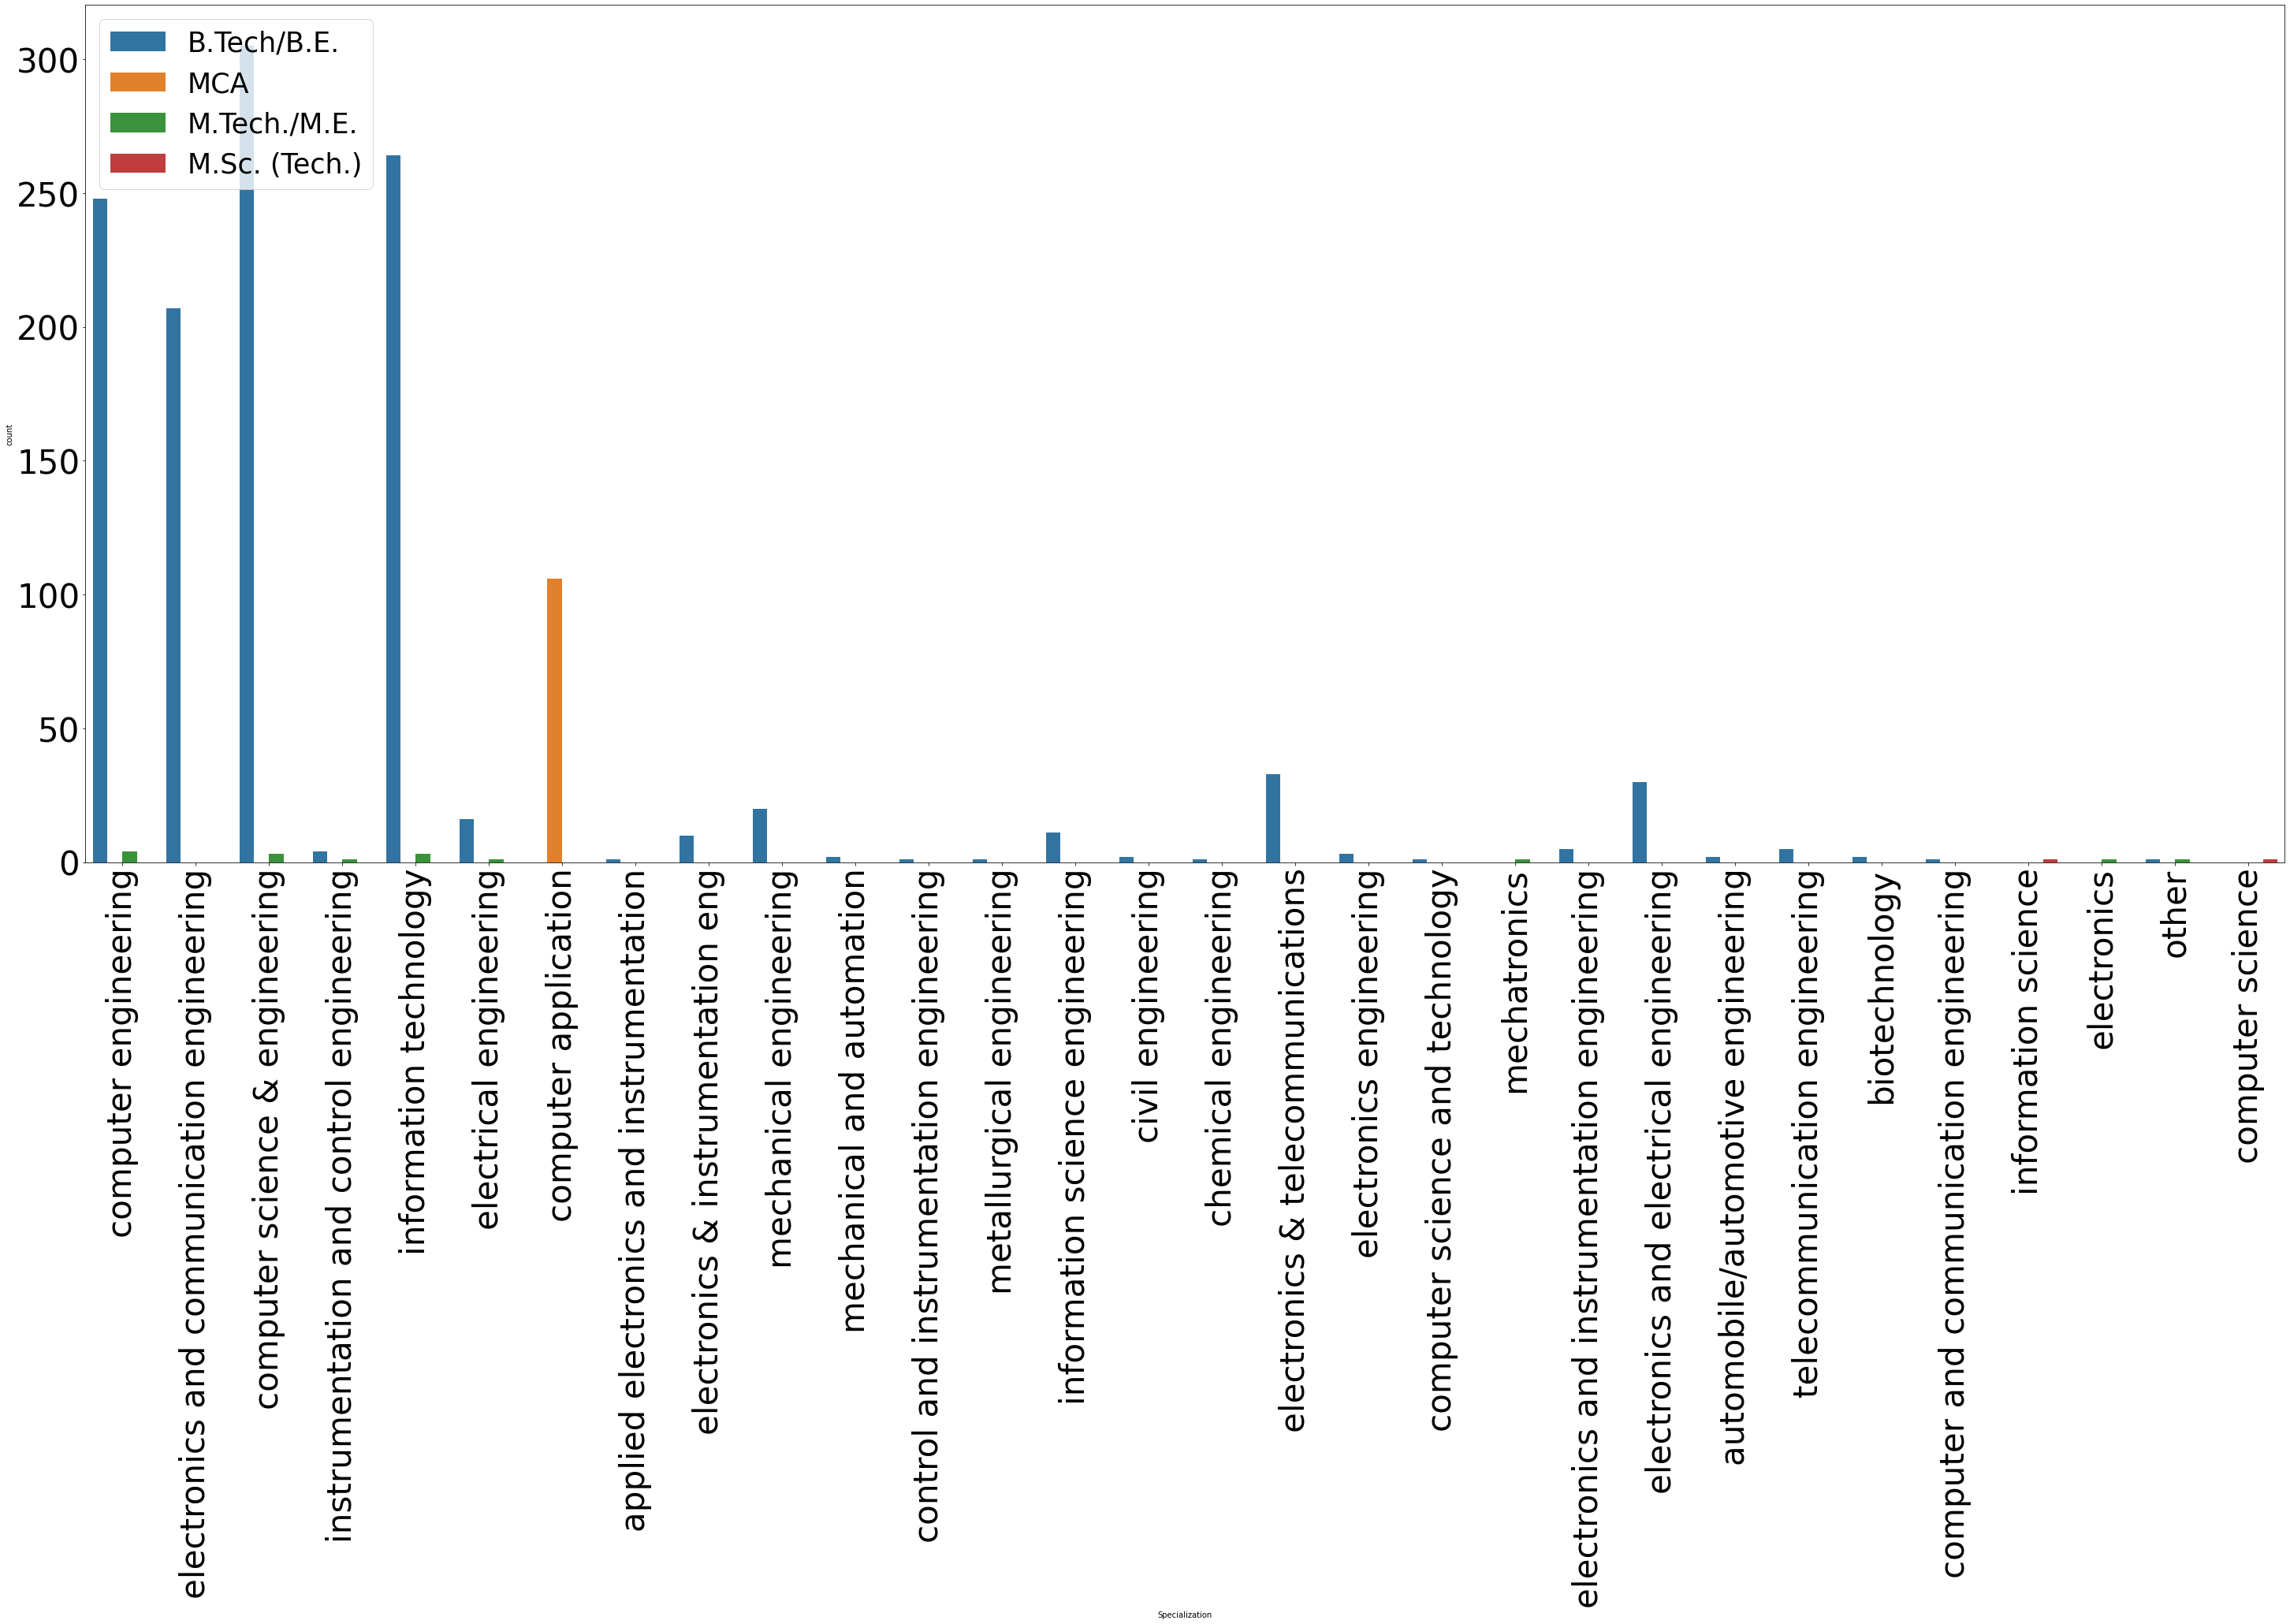

In [66]:
plt.figure(figsize=(50,20))
sns.countplot(x="Specialization",hue="Degree",data=minds)
plt.xticks(fontsize=42,rotation=90)
plt.yticks(fontsize=42)
plt.legend(fontsize=35)

### So Its Confirmed That Major Aspirants dont exceed B.E degree

### Lets Check In Which State most aspirants are working.

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

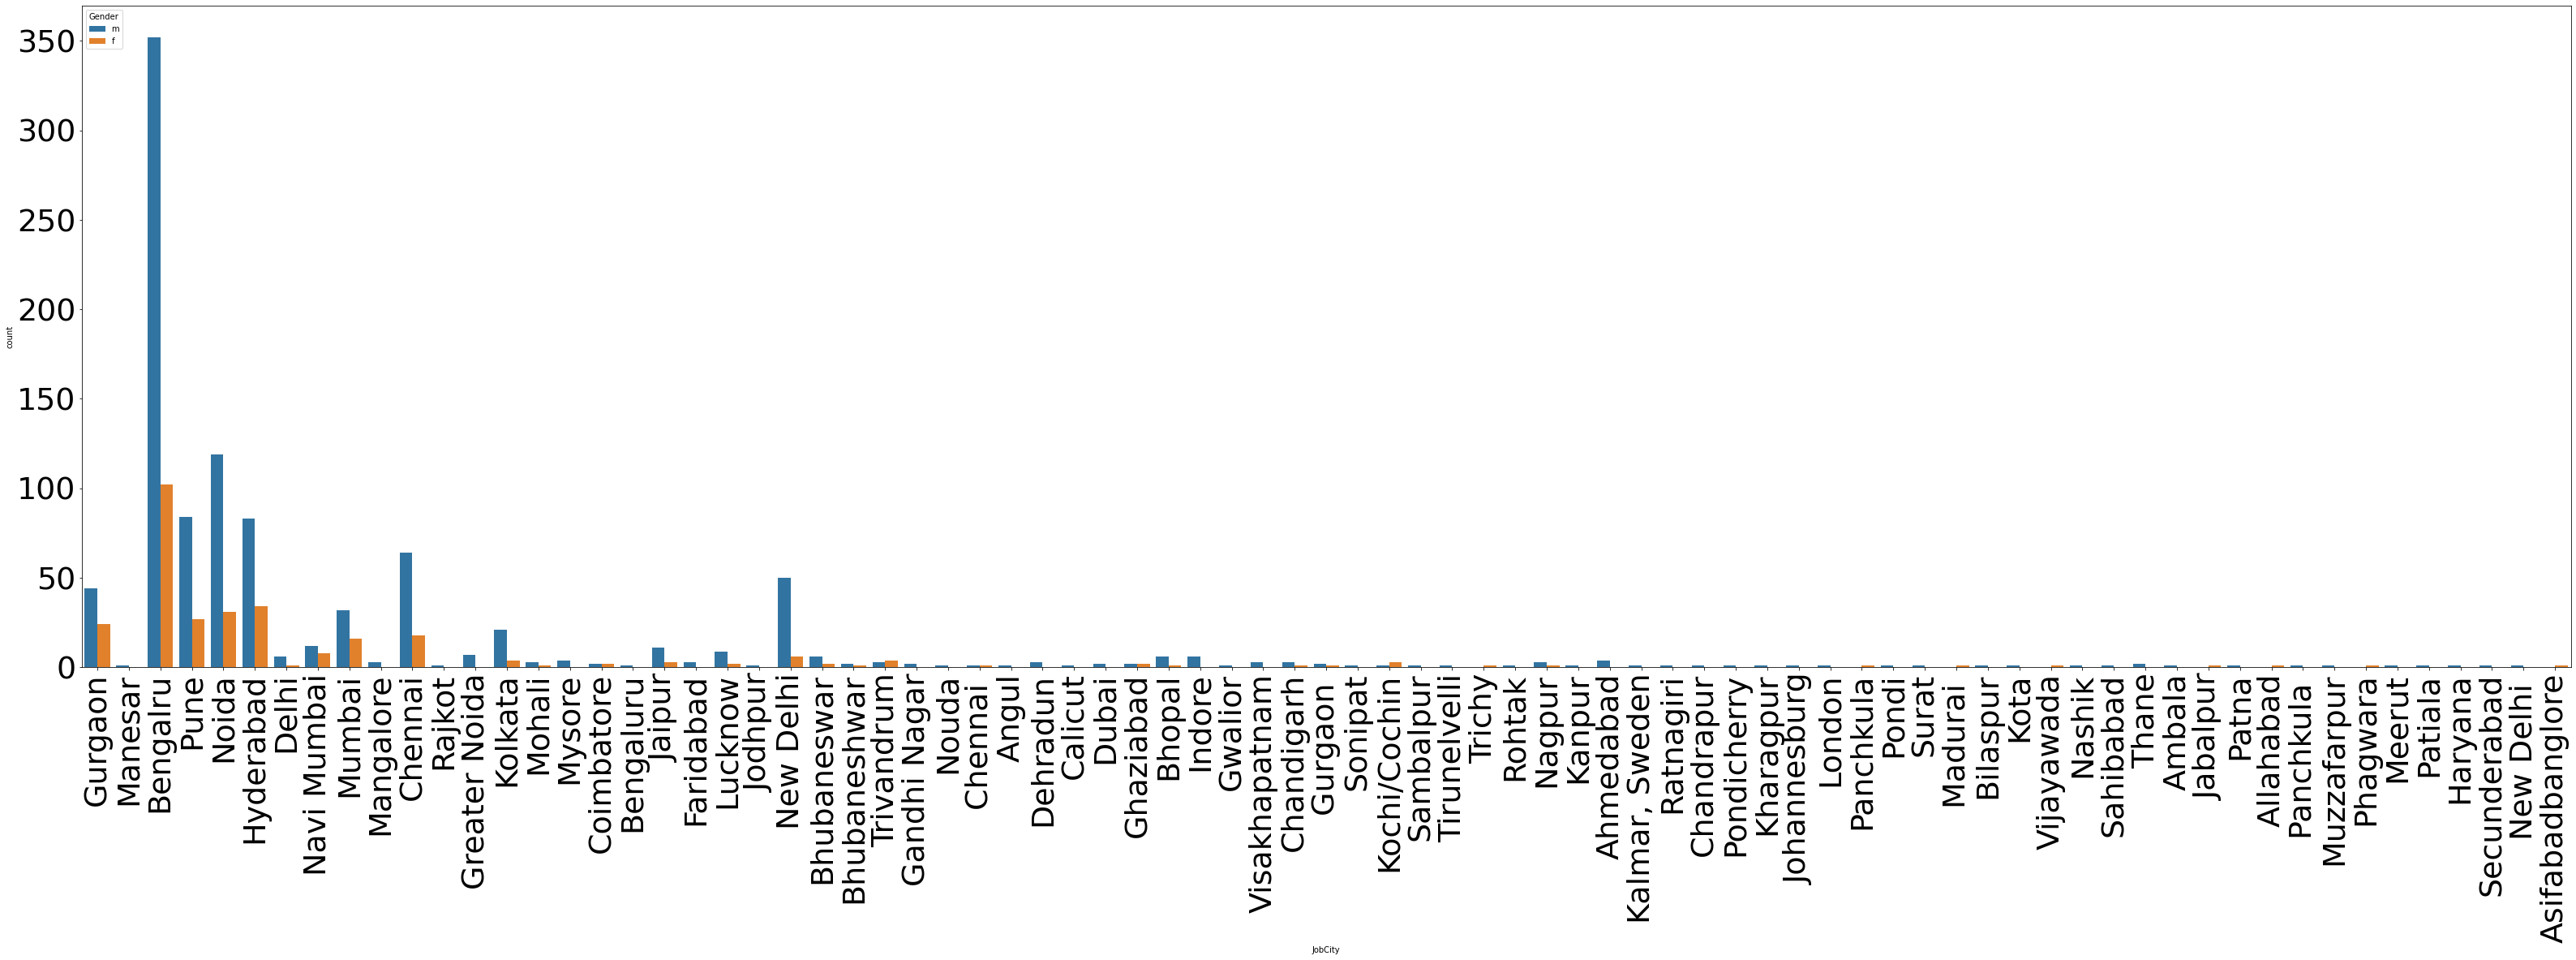

In [67]:
plt.figure(figsize=(55,15))
sns.countplot(x="JobCity",data=minds,hue="Gender")
plt.xticks(fontsize=38,rotation=90)
plt.yticks(fontsize=38)

### Most Of Aspirants Work in Banglore and Its Quite Understandable that Since Most of The Aspirants are Sw engineers and from IT Background, So Its Often Seen that It Back people are Either called or seen in Pune Most so in this case Banglore so its quite understandable

### Lets Check from which region most aspirants are from

(array([  0.,  50., 100., 150., 200., 250.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

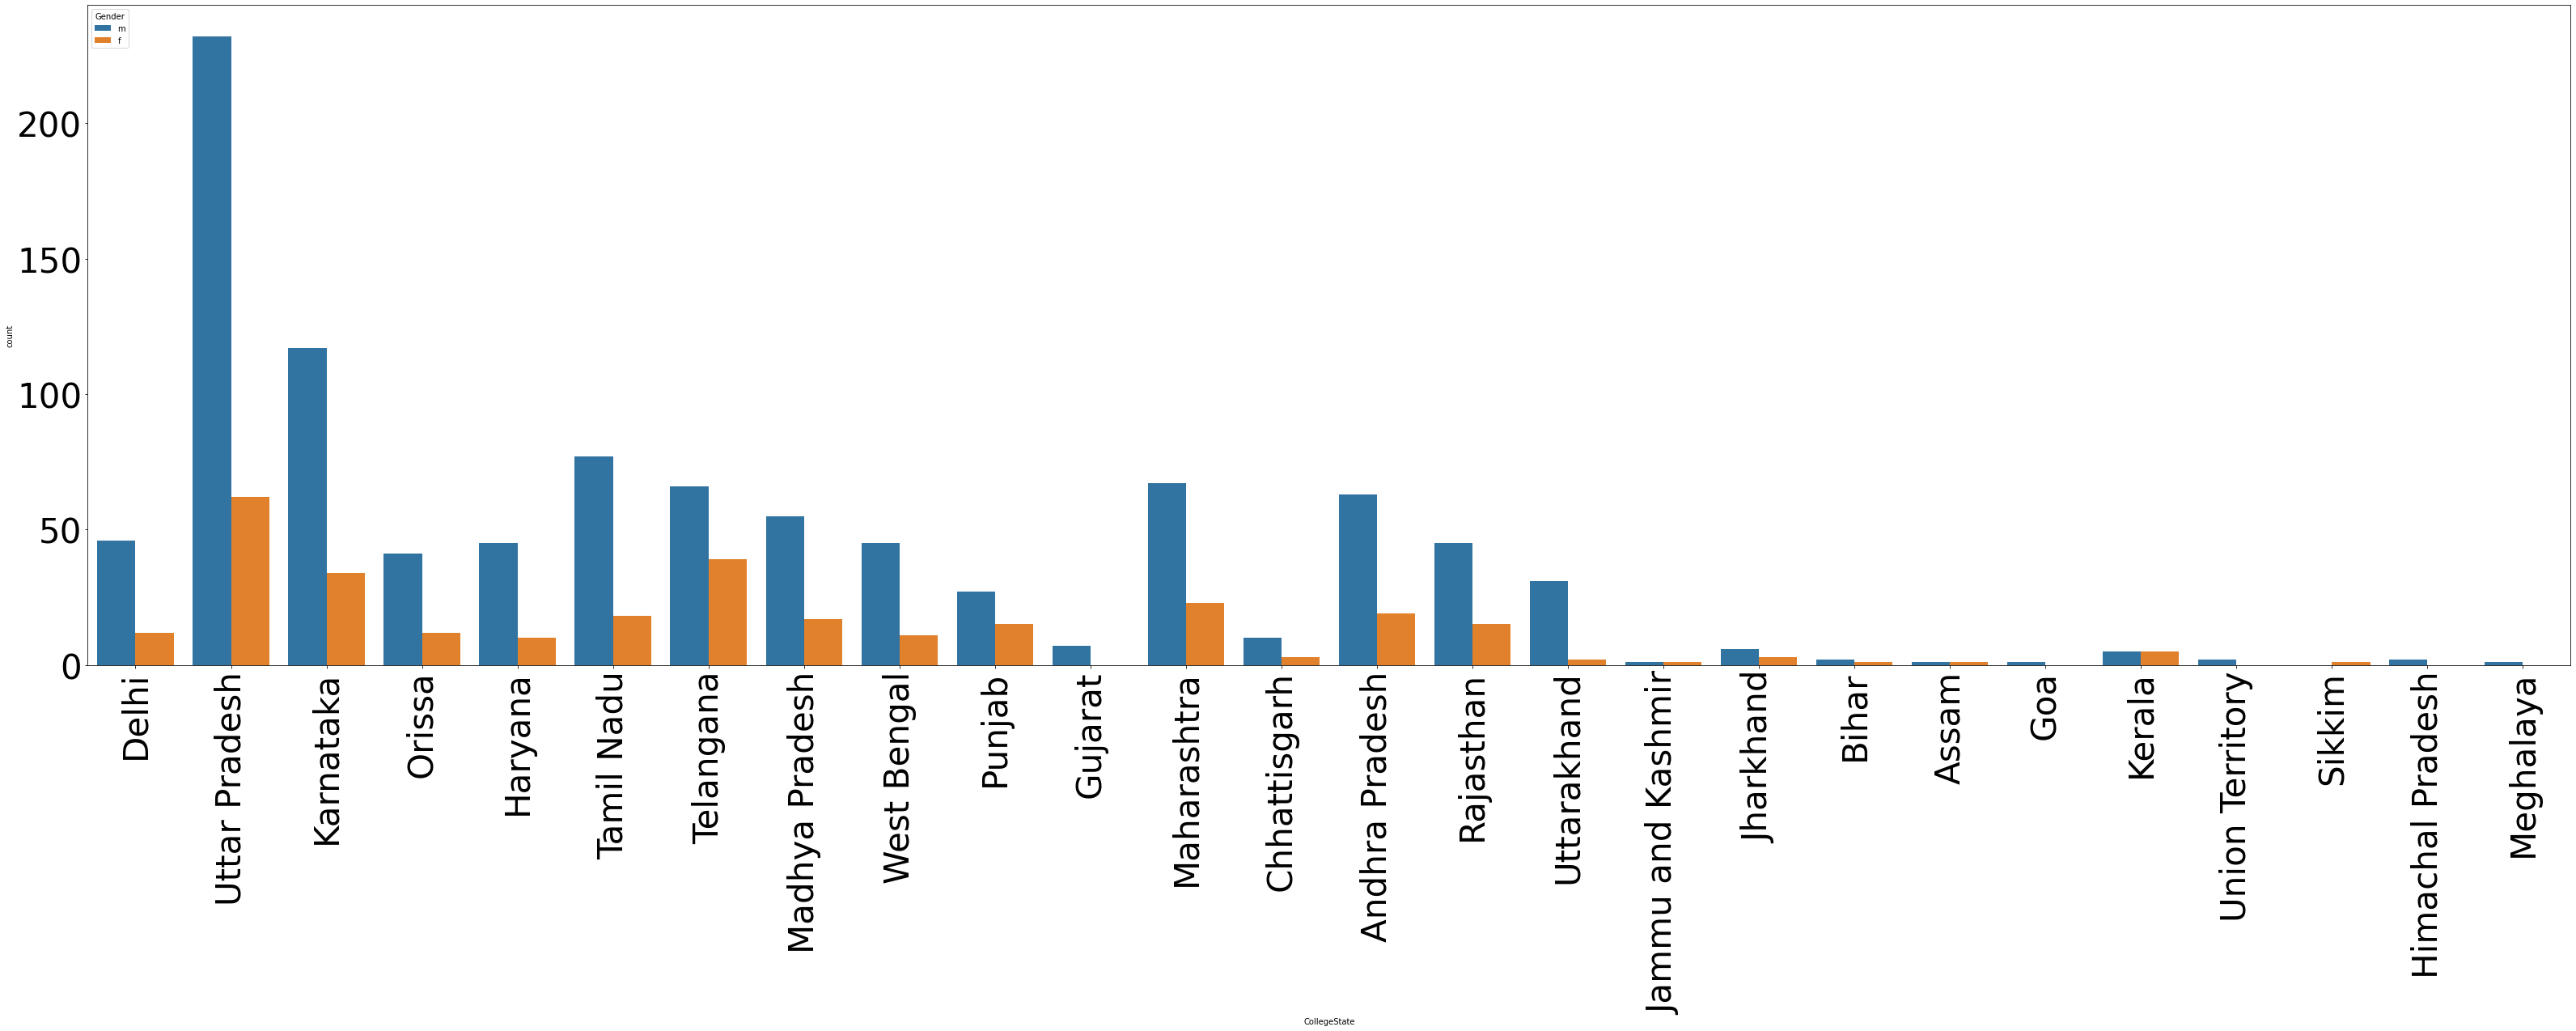

In [68]:
plt.figure(figsize=(55,15))
sns.countplot(x="CollegeState",data=minds,hue="Gender")
plt.xticks(fontsize=42,rotation=90)
plt.yticks(fontsize=42)

### So From Aboove We Can Say That Most of The aspirants are from UP and that too most of them are males.

### Lets Check Graduation Year

<AxesSubplot:xlabel='Designation', ylabel='count'>

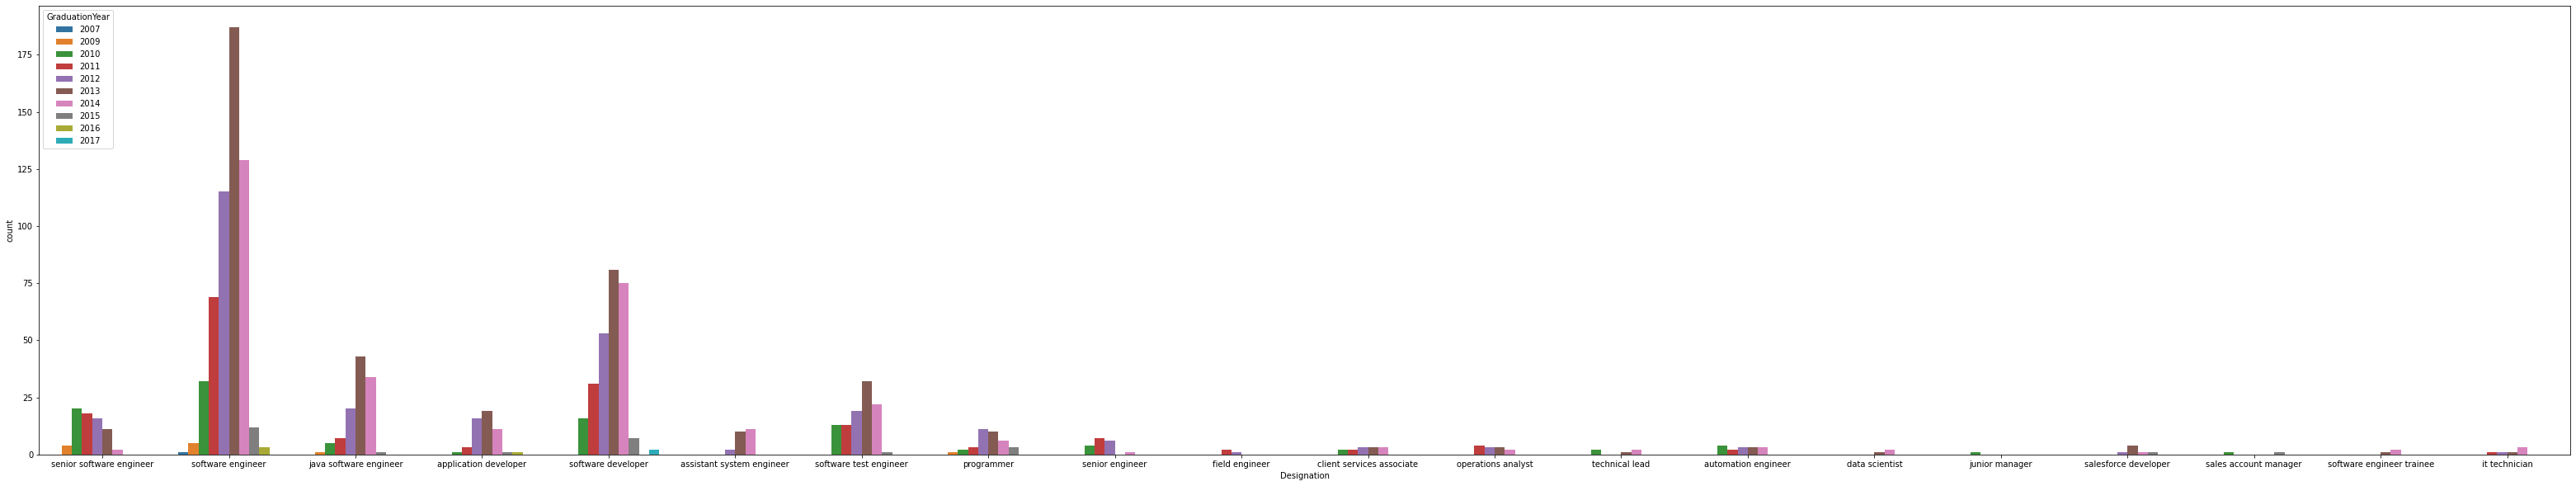

In [69]:
plt.figure(figsize=(55,10))
sns.countplot(x="Designation",data=minds,hue="GraduationYear")

### From aboove we see that most of them have graduated in the year 2013. So uptill now male sw engg working in banglore belong to north with 4 yr exp and 300 K Salary.


### These are AMCAT aspirants and They have work experince of min 5 yrs both males and females but most of them Males. So as we verified that most aspirants who are sw engineers are min 27 yrs old  and have avg 5yr exp with avg salary around 300 K and they work in Banglore State as They all are from IT Background specialized in CSE field,we propose that These Sw engineers are from thier hometown Uttar Pradesh and are 2013 passouts as shown below.


### But All we saw was with wrt to what viusalization was,Lets Test a hypothesis for sw engg field to check whether of not the salary is >=300K,Age>=27,Exp=5.
- Salary<br>
    - $H_O\rightarrow\mu(Salary)\geq$300K<br>
    - $H_1\rightarrow\mu(Salary)<$300K
- Age<br>
    - $H_O\rightarrow\mu(Age)\geq$27<br>
    - $H_1\rightarrow\mu(Age)<$27K
- Experience<br>
    - $H_O\rightarrow\mu(XP)=$4<br>
    - $H_1\rightarrow\mu(XP)\neq$4

In [70]:
np.random.seed(1)
sw_eng_samp=minds[(minds["Designation"]=="software engineer")].sample(100)
saltest=np.round(st.ttest_1samp(sw_eng_samp["Salary"],popmean=3)[1],2)
exptest=np.round(st.ttest_1samp(sw_eng_samp["Exp"],popmean=4)[1],2)
agetest=np.round(st.ttest_1samp(sw_eng_samp["Age"],popmean=27)[1],2)
if saltest<0.05:
    print("We Reject the null claim and state that the AVG salary for Sw engineers is not 300K")
else:
    print("We accept the null claim and state that the AVG salary for Sw engineers is min 300K")
if agetest<0.05:
    print("We Reject the null claim and state that the AVG age for Sw engineers is not 27")
else:
    print("We accept the null claim and state that the AVG age for Sw engineers is 27")
if exptest<0.05:
    print("We Reject the null claim and state that the AVG exp for Sw engineers is not 4 Yrs")
else:
    print("We accept the null claim and state that the AVG exp for Sw engineers is 4 Yrs")

We accept the null claim and state that the AVG salary for Sw engineers is min 300K
We accept the null claim and state that the AVG age for Sw engineers is 27
We accept the null claim and state that the AVG exp for Sw engineers is 4 Yrs


In [71]:
print(minds[minds["Designation"]=="software engineer"][["Gender","JobCity","CollegeState","GraduationYear","Specialization","Degree"]].mode())
print(minds[minds["Designation"]=="software engineer"][["Age","Salary","Exp"]].mean())

  Gender   JobCity   CollegeState  GraduationYear  \
0      m  Bengalru  Uttar Pradesh            2013   

                   Specialization       Degree  
0  computer science & engineering  B.Tech/B.E.  
Age       27.470163
Salary     3.404250
Exp        4.871609
dtype: float64


### So aboove wrt to hyp test and means we see that min age,exp and salary meet the expectation and can say that the
    - Avg Age of Sw engg is 27
    - Avg Salary is 300 K
    - Avg exp is 4 years
### But the aboove was for overall Incliding both genders,we aim to test for Males..so lets filterout towards males.

In [72]:
saltest_m=np.round(st.ttest_1samp(sw_eng_samp[sw_eng_samp["Gender"]=="m"]["Salary"],popmean=3)[1],2)
exptest_m=np.round(st.ttest_1samp(sw_eng_samp[sw_eng_samp["Gender"]=="m"]["Exp"],popmean=4)[1],2)
agetest_m=np.round(st.ttest_1samp(sw_eng_samp[sw_eng_samp["Gender"]=="m"]["Age"],popmean=27)[1],2)
if saltest_m<0.05:
    print("We Reject the null claim and state that the AVG salary for Sw engineers is not 300K")
else:
    print("We accept the null claim and state that the AVG salary for Sw engineers is min 300K")
if agetest_m<0.05:
    print("We Reject the null claim and state that the AVG age for Sw engineers is not 27")
else:
    print("We accept the null claim and state that the AVG age for Sw engineers is 27")
if exptest_m<0.05:
    print("We Reject the null claim and state that the AVG exp for Sw engineers is not 4 Yrs")
else:
    print("We accept the null claim and state that the AVG exp for Sw engineers is 4 Yrs")

We accept the null claim and state that the AVG salary for Sw engineers is min 300K
We accept the null claim and state that the AVG age for Sw engineers is 27
We accept the null claim and state that the AVG exp for Sw engineers is 4 Yrs


In [73]:
minds[(minds["Designation"]=="software engineer") & (minds["Gender"]=="m")][["Age","Salary","Exp"]].mean()

Age       27.568720
Salary     3.417536
Exp        4.909953
dtype: float64

### So Looking Aboove we see that For Male Sw Engineers, The avg age is 27,Salary is 300K and Exp is also 4 which tends to round up to 5 but still its a 4.. Which means when we saw overall stats,the stats most of them pointed for Males.

### Similarly If we take secind highest aspirants,we see that sw developers are there where males are more like sw engineer so same lets see thier avg age,salary and exp.

In [74]:
minds[(minds["Designation"]=="software developer") & (minds["Gender"]=="m")][["Age","Salary","Exp"]].mean()

Age       26.644231
Salary     2.611298
Exp        3.759615
dtype: float64

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

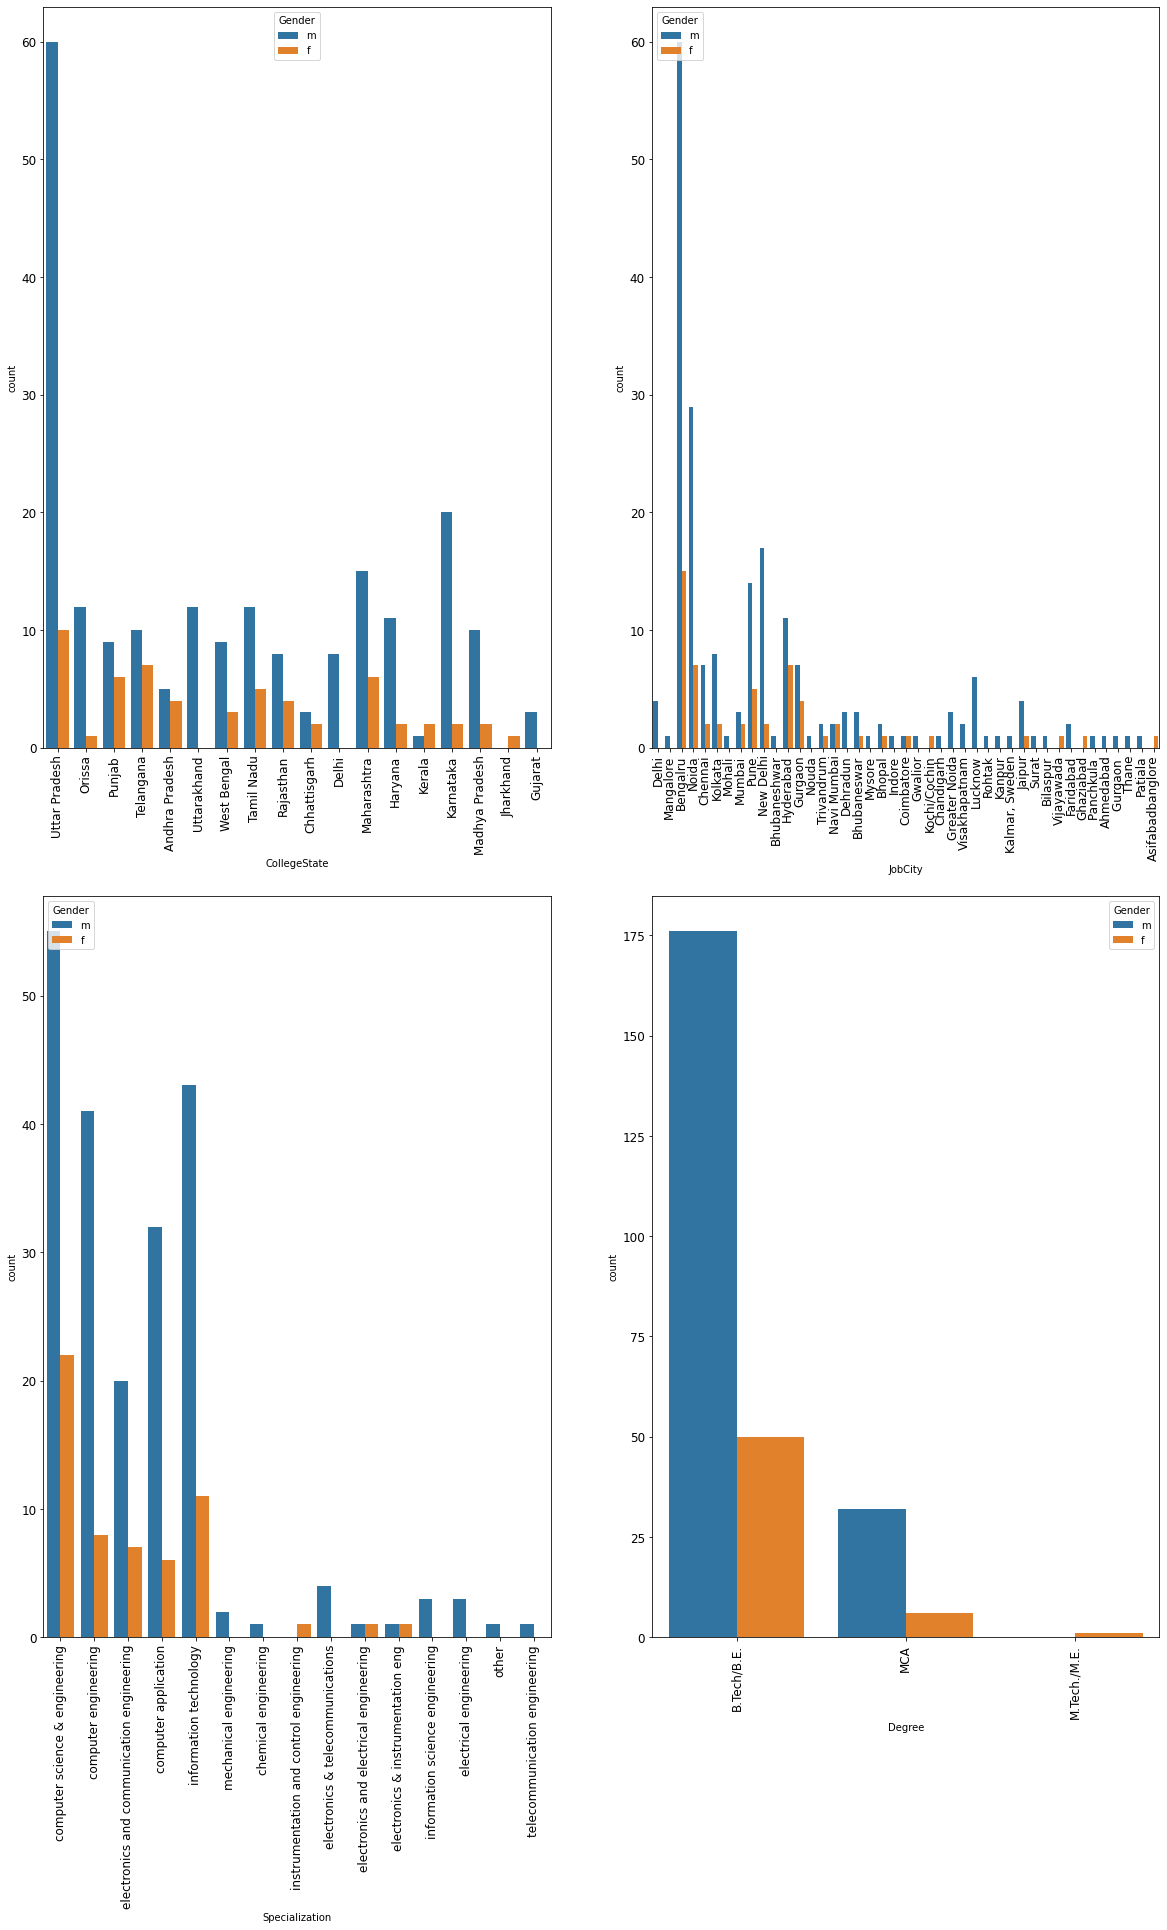

In [75]:
plt.figure(figsize=(20,30))
plt.subplot(221)
sns.countplot(x="CollegeState",data=minds[minds["Designation"]=="software developer"],hue="Gender")
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.subplot(222)
sns.countplot(x="JobCity",data=minds[minds["Designation"]=="software developer"],hue="Gender")
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.subplot(223)
sns.countplot(x="Specialization",data=minds[minds["Designation"]=="software developer"],hue="Gender")
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.subplot(224)
sns.countplot(x="Degree",data=minds[minds["Designation"]=="software developer"],hue="Gender")
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)

### So for Sw dev whic is second tp aspirant  have avg exp of around 4 and salary around 200K and age around 25 to 28 or to be precise range of 20 to 35 and  most of them are from UP and work In banglore city 2013 passouts. So Similarly We can say that most of the IT Domain aspirants come from North and most of them work in Banglore State. Lets Verify This via hypothesis.

- Salary<br>
    - $H_O\rightarrow\mu(Salary)\geq$200K<br>
    - $H_1\rightarrow\mu(Salary)<$200K
- Age<br>
    - $H_O\rightarrow\mu(Age)\geq$26<br>
    - $H_1\rightarrow\mu(Age)<$26K
- Experience<br>
    - $H_O\rightarrow\mu(XP)=$3<br>
    - $H_1\rightarrow\mu(XP)\neq$3

In [76]:
np.random.seed(1)
sw_dev_samp=minds[(minds["Designation"]=="software developer")].sample(100)
saltest_dev=np.round(st.ttest_1samp(sw_dev_samp["Salary"],popmean=2.5)[1],2)
exptest_dev=np.round(st.ttest_1samp(sw_dev_samp["Exp"],popmean=3)[1],2)
agetest_dev=np.round(st.ttest_1samp(sw_dev_samp["Age"],popmean=26)[1],2)
print(saltest_dev,exptest_dev,agetest_dev)

0.55 0.06 0.32


### Overall we can say that for Sw devs, The average Age,Exp and Salary is 250K,3yrs and 26 yrs.

### Now lets look for males as they have high frequency.

In [77]:
saltest_dev_m=np.round(st.ttest_1samp(sw_dev_samp[sw_dev_samp["Gender"]=="m"]["Salary"],popmean=2.5)[1],2)
exptest_dev_m=np.round(st.ttest_1samp(sw_dev_samp[sw_dev_samp["Gender"]=="m"]["Exp"],popmean=3.5)[1],2)
agetest_dev_m=np.round(st.ttest_1samp(sw_dev_samp[sw_dev_samp["Gender"]=="m"]["Age"],popmean=26)[1],2)
print(saltest_dev_m,exptest_dev_m,agetest_dev_m)

0.89 0.43 0.13


In [78]:
print(minds[(minds["Designation"]=="software developer") & (minds["Gender"]=="m")][["Age","Salary","Exp"]].mean())

Age       26.644231
Salary     2.611298
Exp        3.759615
dtype: float64


In [79]:
print(minds[minds["Designation"]=="software developer"][["Gender","JobCity","CollegeState","GraduationYear","Specialization","Degree"]].mode())
print(minds[minds["Designation"]=="software developer"][["Age","Salary","Exp"]].mean())

  Gender   JobCity   CollegeState  GraduationYear  \
0      m  Bengalru  Uttar Pradesh            2013   

                   Specialization       Degree  
0  computer science & engineering  B.Tech/B.E.  
Age       26.660377
Salary     2.583774
Exp        3.883019
dtype: float64


### As we can see that Avg Salary for sw devs males is 250K,And Exp of 3 and Age of 26 but near to 27 and Unlike Sw engineers,Sw devs have low stats.

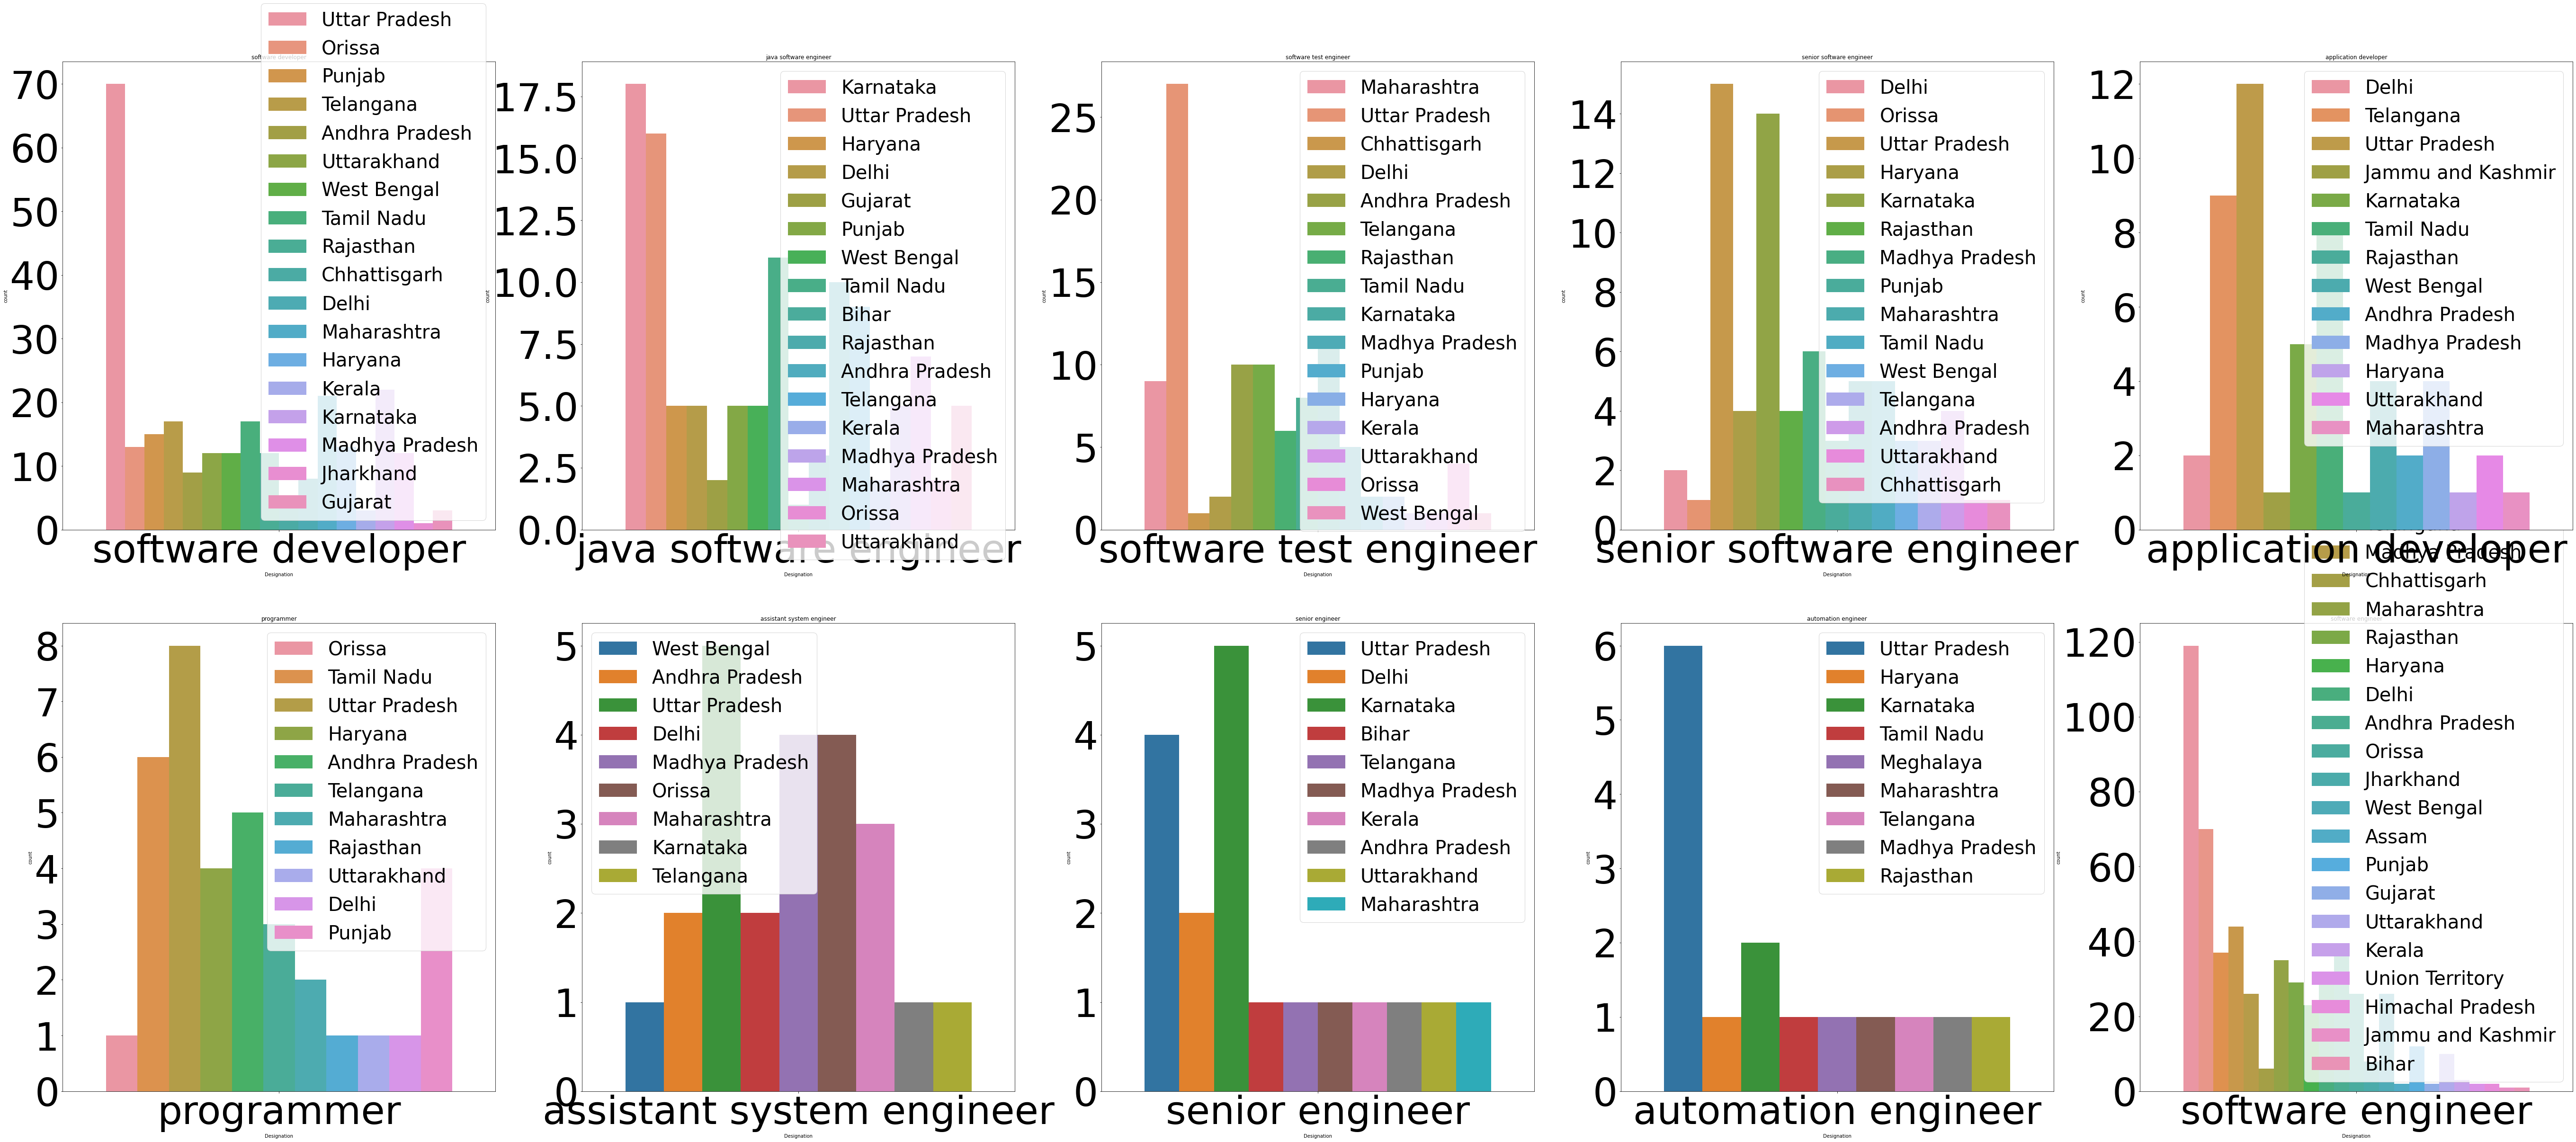

In [80]:
plt.figure(figsize=(95,40))
for j in range(len(top_20_fields[:10])):
    plt.subplot(str(25)+str(j))
    sns.countplot(x="Designation",data=minds[(minds["Designation"]==top_20_sal_fields[j])],hue="CollegeState")
    plt.title(top_20_sal_fields[j])
    plt.xticks(fontsize=82)
    plt.yticks(fontsize=82)
    plt.legend(fontsize=40)

### So its Confirmed that Sw devs are also from North i.e UP

In [81]:
minds["SAL"]=minds["Salary"].apply(lambda x:">=500K" if x>=5 else "<500K")
minds["EXPR"]=minds["Exp"].apply(lambda x:str(x))
minds["GPA"]=minds["collegeGPA"].apply(lambda x:str(x))
np.random.seed(1)
mindSample=minds[['Designation', 'JobCity', 'Gender','Degree', 'Specialization', 'EXPR',"GPA","SAL"]].groupby("Gender").sample(200)

In [82]:
# mindSample["JobCity"].replace("Bangalore ","Bengalru",inplace=True)
# mindSample["JobCity"].replace("Jaipur ","Jaipur",inplace=True)
# mindSample["JobCity"].replace("Gandhinagar","Gandhi Nagar",inplace=True)
# mindSample["JobCity"].replace("Hyderabad ","Hyderabad",inplace=True)
# mindSample["JobCity"].replace("Hyderabad(Bhadurpally)","Hyderabad",inplace=True)
# mindSample["JobCity"].replace("Bhubaneswar ","Bhubaneswar",inplace=True)
# mindSample["JobCity"].replace("Delhi/Ncr","Delhi",inplace=True)
# mindSample["JobCity"].replace("Nagpur ","Nagpur",inplace=True)
# mindSample["JobCity"].replace("Pune ","Pune",inplace=True)
# mindSample["JobCity"].replace("Trivandrum ","Trivandrum",inplace=True)
# mindSample["JobCity"].replace("Thiruvananthapuram","Trivandrum",inplace=True)


So in aboove We Were Done with The testing of whether or not SW engineer Males have Avg exp of 5,Age of 27 and Salary of 300 K.So Looking at the tests we Conclude That

- MOST OF THE ASPIRANT WHO ARE MALES AND SW ENGINEERS,DO HAVE A SALARY OF AVG 300K AND MORE BUT MIN START IS 300K AND AGE OF 27 OR MORE WITH MIN STARTING AS 27 BUT FOR THE EXP WHICH WE CLAIMED TO BE AVG OF 5YRS IS NOT TRUE INSTEAD ITS NEAR TO 5 BUT NOT 5 AND THE AVG EXP IS 4 YRS OR PRECISELY IT CAN BE ALSO SAID THAT MIN 4 YRS-4.9

In [83]:
pd.crosstab(mindSample["JobCity"],mindSample["SAL"])

SAL               <500K  >=500K
JobCity                        
Angul                 0       1
Asifabadbanglore      1       0
Bengalru            118      19
Bhopal                2       0
Bhubaneswar           2       0
Calicut               1       0
Chandigarh            1       0
Chandrapur            1       0
Chennai              24       1
Coimbatore            1       0
Dehradun              1       0
Delhi                 2       0
Gandhi Nagar          1       0
Ghaziabad             1       0
Gurgaon              16       3
Hyderabad            34       4
Indore                2       0
Jabalpur              1       0
Jaipur                3       2
Jodhpur               1       0
Kochi/Cochin          3       0
Kolkata               4       0
Kota                  1       0
Lucknow               3       0
Mangalore             3       0
Mohali                1       0
Mumbai               16       2
Mysore                1       1
Nagpur                3       0
Nashik                1       0
Navi Mumbai           8       0
New Delhi            12       3
Noida                41       3
Panchkula             0       1
Pune                 35       4
Sonipat               1       0
Surat                 1       0
Thane                 1       0
Trichy                1       0
Trivandrum            4       0
Vijayawada            1       0
Visakhapatnam         2       0

In [84]:
for i in mindSample.columns[:-1]:
    catrelation=pd.crosstab(mindSample[i],mindSample["SAL"])
    pv=cst(catrelation)[1]
    if pv<0.05:
        print("There is relation between {} as pv is less than 0.05".format(i))
    else:
        print("There is no relation between {} as pv is not less than 0.05".format(i))

There is relation between Designation as pv is less than 0.05
There is no relation between JobCity as pv is not less than 0.05
There is no relation between Gender as pv is not less than 0.05
There is no relation between Degree as pv is not less than 0.05
There is relation between Specialization as pv is less than 0.05
There is relation between EXPR as pv is less than 0.05
There is no relation between GPA as pv is not less than 0.05


#### <font color="green" size="6">So according to our test hypothesis, We state that For Salary Being High or Low it depends on aspirant's designation,EXPR and specialization but good news is college gpa and degree make no impact of our salary :)</font>


### So now we checked for slaray,exp and age,lets check whether or not sw engg males belong to UP,Work in banglore, Specialization is CSE and Degree is B.E to state in final conclusion.

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

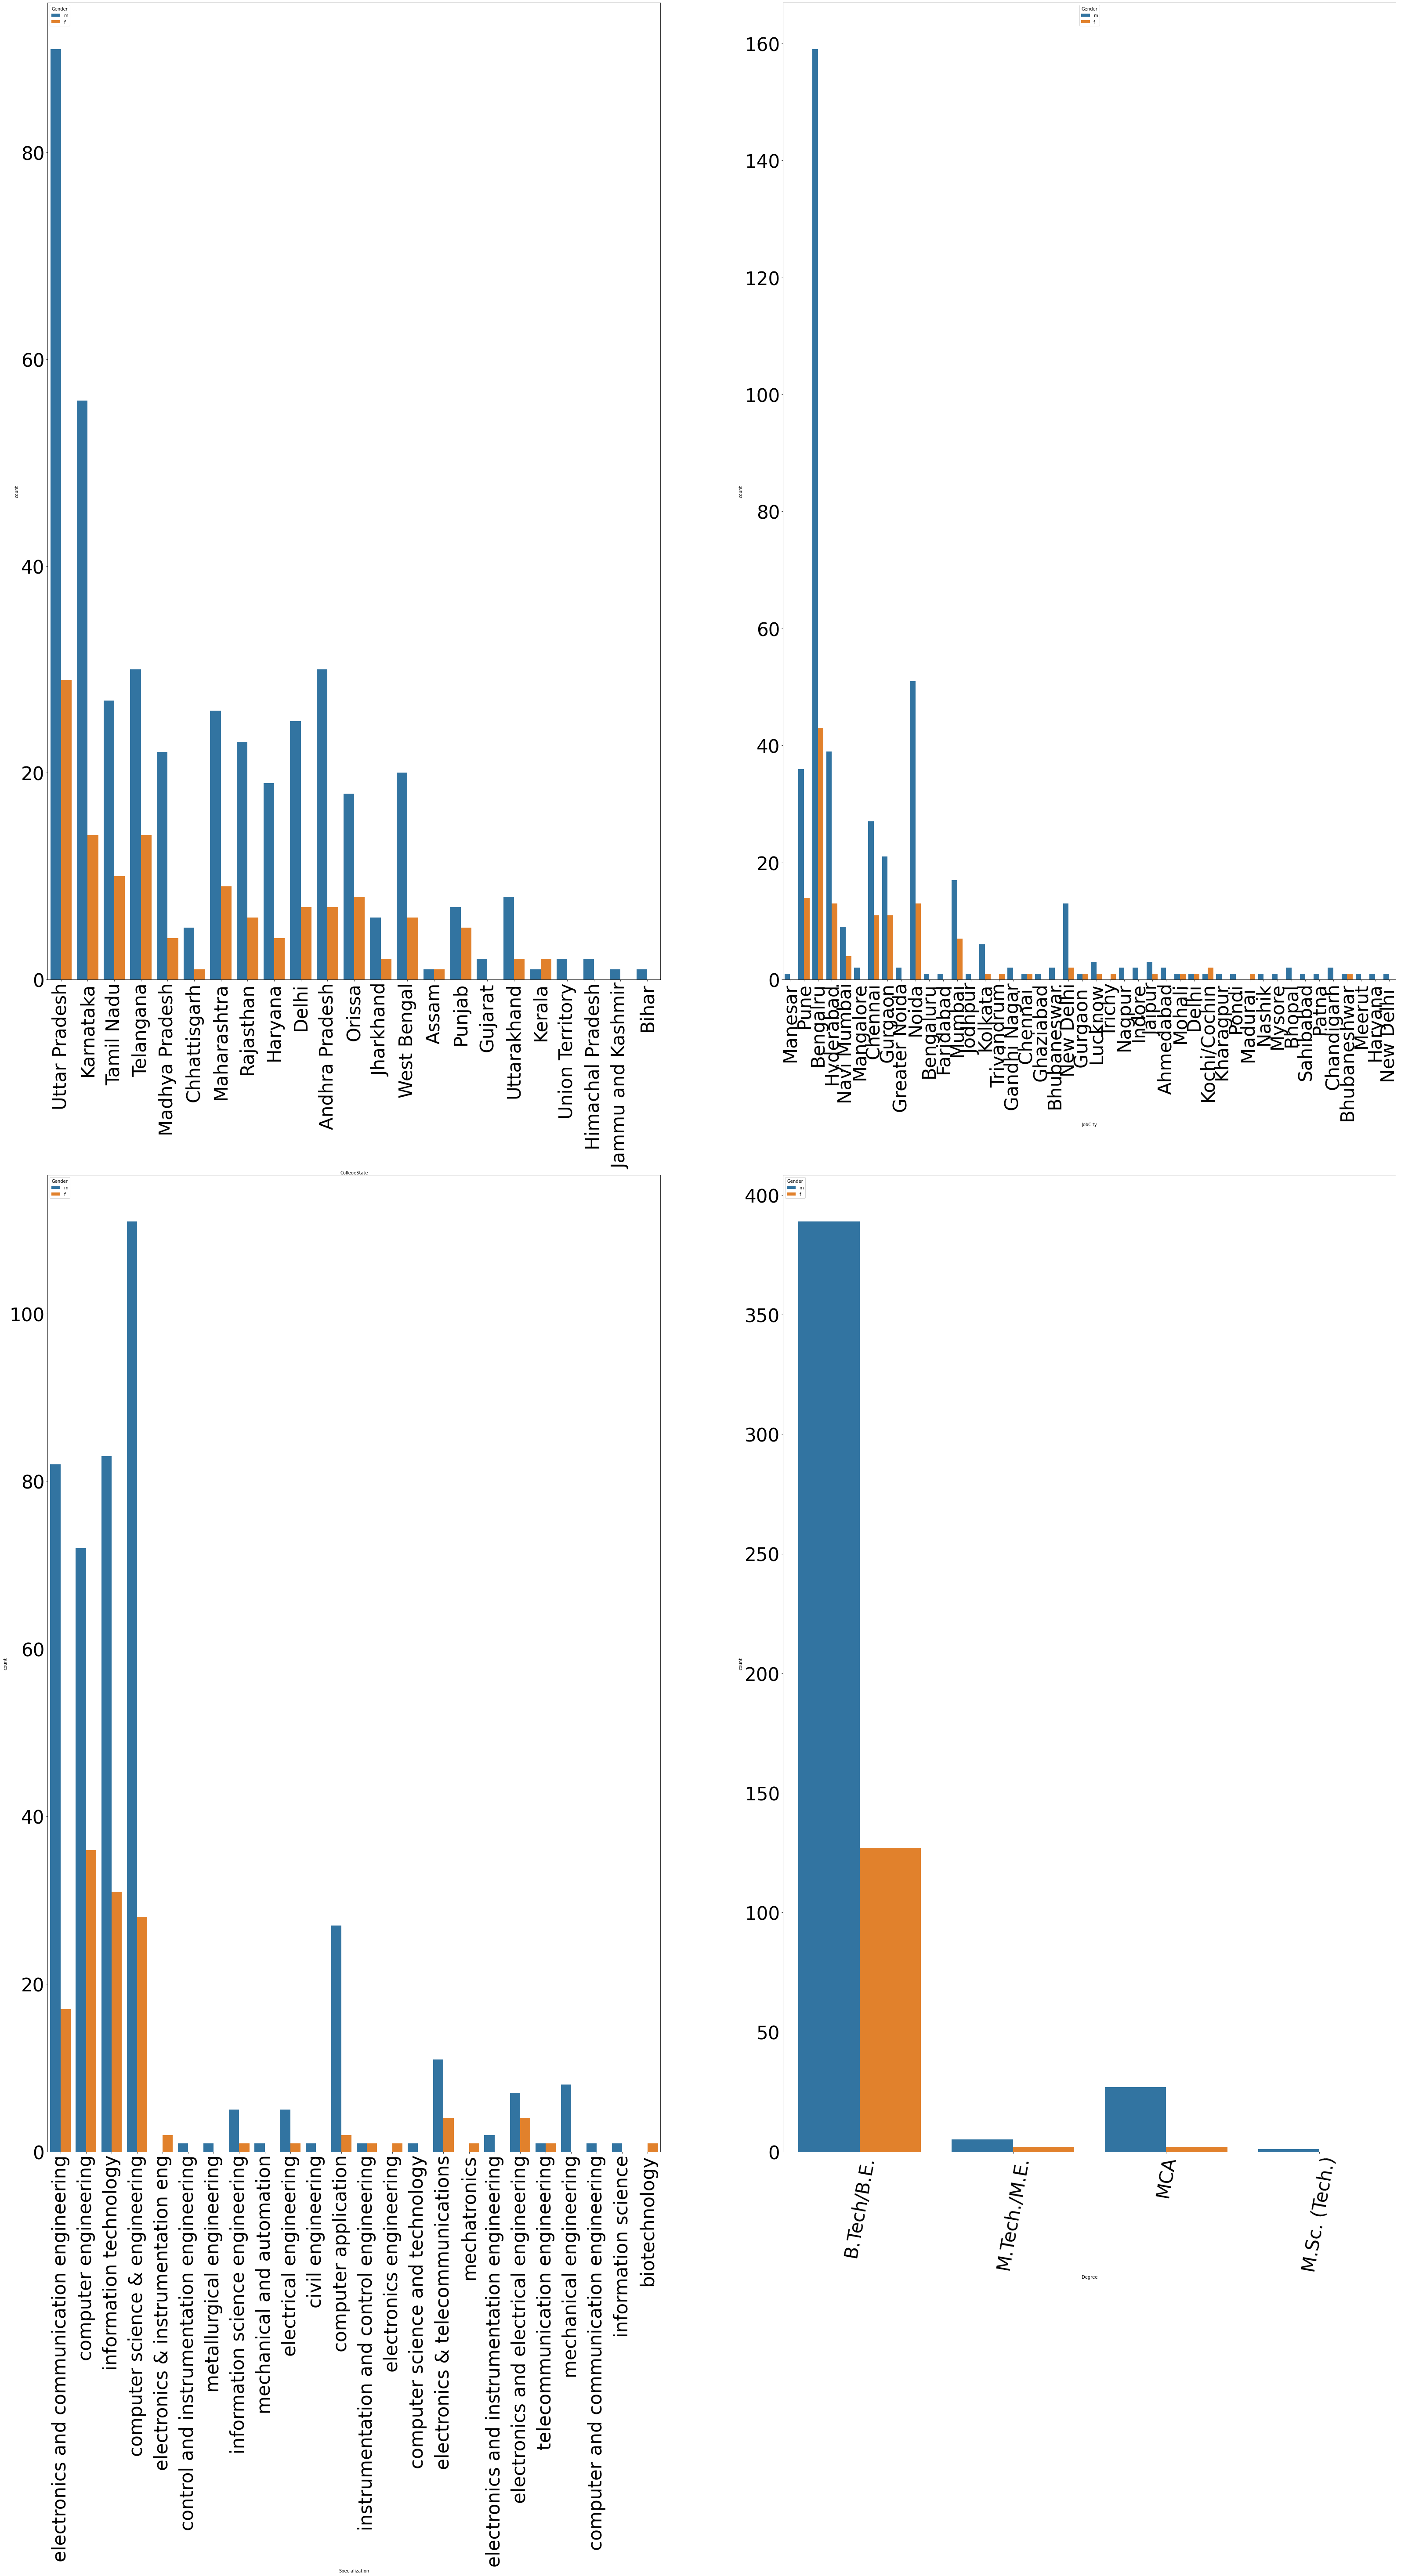

In [85]:
plt.figure(figsize=(55,90))
plt.subplot(221)
sns.countplot(x="CollegeState",hue="Gender",data=minds[minds["Designation"]=="software engineer"])
plt.xticks(fontsize=42,rotation=90)
plt.yticks(fontsize=42)
plt.subplot(222)
sns.countplot(x="JobCity",hue="Gender",data=minds[minds["Designation"]=="software engineer"])
plt.xticks(fontsize=42,rotation=90)
plt.yticks(fontsize=42)
plt.subplot(223)
sns.countplot(x="Specialization",hue="Gender",data=minds[minds["Designation"]=="software engineer"])
plt.xticks(fontsize=42,rotation=90)
plt.yticks(fontsize=42)
plt.subplot(224)
sns.countplot(x="Degree",hue="Gender",data=minds[minds["Designation"]=="software engineer"])
plt.xticks(fontsize=42,rotation=80)
plt.yticks(fontsize=42)

# <CENTER><U><I>FINAL CONCLUSION AND ANALYSIS OBSERVATION:</I></U></CENTER>
- <font color="RED" size="4" style="background-color:cornsilk;"><i><b>SO FINALLY WE INFER THAT MOST OF THE AMCAT ASPIRANTS ARE MALES WITH AVG AGE AREOUND 27 COMING FROM NORTHEN SIDE FROM U.P AND ARE FROM IT DOMAIN WITH MOST OF THEM AS SW ENGINEERS AS PROFFESION WORKING IN BANGLORE WITH DEGREE : SPECIALIZATION AS BE:CSE HAVING EXP OF 4 YRS AND SALARY AROUND 300 K.</b></i></font>


- <font color="NAVY" size="4" style="background-color:CYAN;"><i><b>SO AFTER SW ENGINEER,AS EXTRA WE LOOKED AT SECOND HIGHEST PROFFESION SW DEVELOPER AFTER SW ENGINEER AND FOR SW DEVELOPER THE AVERAGE SALARY IS 250K AND AVG AGE OF 26 YRS AND EXP OF 3 YRS AND LIKE SW ENGG THEY TOO COME FROM U.P WHO WORK IN BANGLORE AND SAME LIKE THEM HAVE SPECIALIZATION:DEGREE AS BE:CSE</b></i></font>

# But it is claimed that 


<br><br>
<b>
<i>“After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.”</i>
    </b>

In [86]:
aspiring["Exp"]=pd.to_datetime(aspiring["DOL"]).dt.year-pd.to_datetime(aspiring["DOJ"]).dt.year

In [87]:
minds_2=aspiring[(aspiring["Designation"].isin(["programmer analyst","software engineer","hardware engineer","associate engineer"])) & (aspiring["Exp"]<1)][["Designation","Salary","Gender","Specialization"]]

# We saw that For experinced sw engineers the salary was around 5 lakhs, Lets See for Freshers.

<AxesSubplot:xlabel='Designation', ylabel='Salary'>

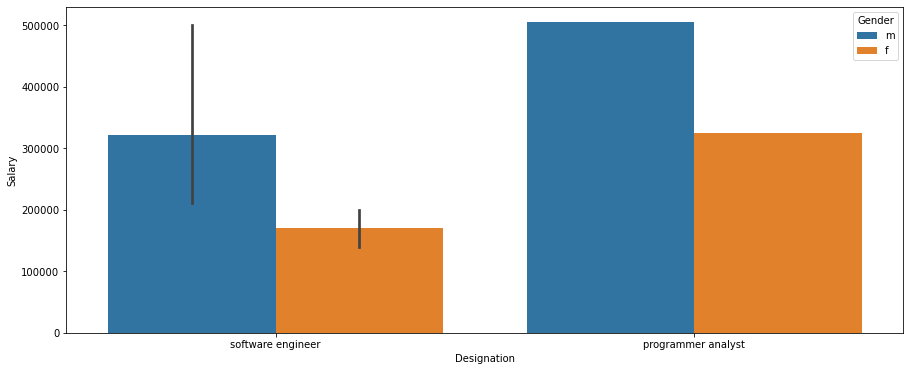

In [88]:
plt.figure(figsize=(15,6))
sns.barplot(x="Designation",y="Salary",hue="Gender",data=minds_2)

# From aboove we can see that for freshers The Salary starts from 300K or we can say for sure the min salary is sure shot ABOOVE 200K.Lets Test This..

$H_O=\mu=250K$<br>
$H_1=\mu\neq250K$

In [89]:
from scipy import stats as st
from scipy.stats import chi2_contingency as cst
pv=st.ttest_1samp(minds_2["Salary"],popmean=250000)[1]
if pv<0.05:
    print("We reject the null hypthesis and say that Avearge Salary for aboove fields is not 250K")
else:
    print("The avg salary for fresh grads is 250K")

The avg salary for fresh grads is 250K


# From aboove we see that the claim made about grads having salary of 250k is true.

# Now lets test is there any relation between Gender and Specialization

$H_O=$There is no Relation between Gender and Specialization,Gender doesnt impacts Specialization<br>
$H_1=$There is Relation between Gender and Specialization,Gender impacts Specialization

In [90]:
dfsc=pd.crosstab(minds_2["Gender"],minds_2["Specialization"],margins=True)
pv_1=cst(dfsc)
if pv_1[1]<0.05:
    print("There is relation and gender does impact What specializations are done")
else:
    print("There is no relation and gender doesnt impacts What specializations are done")

There is no relation and gender doesnt impacts What specializations are done


#### <font color="RED" size="6" style="background-color:cornsilk;"><i><b>SO FROM ABOOVE THE CLAIM THAT FOR FRESHERS THE SALARY IS BETWEEN 2 TO 3 LAKHS BUT THE SECOND CLIAM WHICH SAYS GENDER IMPACTS SPECIALIZATION,tHAT IS faLSE </b></i></font>

In [446]:
aspiring["Age"]=pd.to_datetime(aspiring["DOL"]).dt.year-pd.to_datetime(aspiring["DOB"]).dt.year
aspiring.to_csv("C:\\Users\\Angat\\Downloads\\APP_2\\aspiring.csv",index=False)